## EDA & Machine Learning


In [ ]:
# Data Analysis & Manipulation
import numpy as np
import pandas as pd
from scipy import stats

# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Data Analysis & Manipulation
import numpy as np
import pandas as pd

# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocessor, Scaler, Sampler
from sklearn.preprocessing import LabelEncoder, StandardScaler, power_transform
from scipy.stats import zscore
from statsmodels.stats.outliers_influence import variance_inflation_factor
from imblearn.over_sampling import SMOTE

# Regressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import Lasso,Ridge, LinearRegression, SGDRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, BaggingRegressor, AdaBoostRegressor
from xgboost import XGBRegressor

#Classifiers
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import RidgeClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

#Evaluation & Metrics
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, RandomizedSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score, precision_score, recall_score
from sklearn.metrics import roc_auc_score, roc_curve, auc

#Saving Model
import pickle

# Prevent WARNINGS!
import warnings
warnings.filterwarnings('ignore')

In [ ]:
#Loading_dataset
df = pd.read_csv('shoe_brand.csv')
df

,Unnamed: 0,Brand,Shoename,Category,no_of_colors,Price,Count_of_sizes,Name_ of_colors,Product_code,Review,Size,Comfort,Features,star_rating
0,0,Nike,Air Force 1 '07,Men,2.0,7 495.00,13.0,White/White,CW2288-111,1311.0,"['7', '7.5', '8', '8.5', '9', '9.5', '10', '10...",The stitched overlays on the upper add heritag...,LEGENDARY STYLE REFINED.\n\nThe radiance lives...,NaN
1,1,Nike,Air Max 1,Men,5.0,12 795.00,17.0,White/Photon Dust/Black/University Blue,FD9082-103,88.0,"['6', '6.5', '7', '7.5', '8', '8.5', '9', '9.5...","Plush and comfortable, the Max Air cushioning ...",\nMeet the leader of the pack. Walking on clo...,4.8
2,2,Nike,Air Max 90,Men,1.0,11 895.00,13.0,Anthracite/Black/Mystic Red/Summit White,FB9658-001,3.0,"['7', '7.5', '8', '8.5', '9', '9.5', '10', '10...",The textile upper with leather and synthetic o...,\nLace up and feel the legacy in this champio...,4.7
3,3,Nike,Jordan Max Aura 5,Men,5.0,11 895.00,15.0,White/Varsity Red/Wolf Grey/Black,DZ4353-101,22.0,"['7', '7.5', '8', '8.5', '9', '9.5', '10', '10...",Nike Air-Sole units provide lightweight cushio...,"\nWhenyou need a shoe that's ready 24/7, it's...",NaN
4,4,Nike,Air Force 1 '07 Pro Tech,Men,3.0,13 995.00,17.0,Light Silver/Clear/Light Silver,FB8875-002,8.0,"['6', '6.5', '7', '7.5', '8', '8.5', '9', '9.5...",The leather upper with stitched overlays ages ...,\nThe radiance lives on in the Air Force 1 '0...,4.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10432,2435,Woodland,DBLUE Casual Sneakers,Men,1.0,2 497,6.0,DBLUE,FGC0AI024031B,NaN,"['36', '37', '38', '39', '40', '41']",Dark blue lightweight high-ankle casual sneake...,Dark blue lightweight high-ankle casual sneake...,NaN
10433,2436,Woodland,Red Ankle Strap Sandal,Men,1.0,2 000,2.0,RED,FLF0180Z7602A,NaN,"['40', '41']",High heel Closed-toe Ankle-strap,A stand-out red sandal from Woods features poi...,NaN
10434,2437,Woodland,Grey Slip-On Sneaker,Men,1.0,4 197,6.0,GREY,FLC0H40U3332A,NaN,"['36', '37', '38', '39', '40', '41']",Slip-on Pull tab Fabric upper Knit constructio...,Modern sneaker with a knit construction around...,NaN
10435,2438,Woodland,Woodland Khaki Casual Shoes,Men,1.0,2 747,2.0,KHAKI,FGC013005491E,NaN,"['39', '45']",Rubber Sole Elephant print Anti corrosive meta...,Woodland offers versatile round toe lace-up lo...,NaN


In [ ]:
# Renaming two columns
df.rename(columns={'Unnamed: 0': 'Sno', 'Name_ of_colors': 'Name_of_colors'}, inplace=True)

In [ ]:
df.head()

,Sno,Brand,Shoename,Category,no_of_colors,Price,Count_of_sizes,Name_of_colors,Product_code,Review,Size,Comfort,Features,star_rating
0,0,Nike,Air Force 1 '07,Men,2.0,7 495.00,13.0,White/White,CW2288-111,1311.0,"['7', '7.5', '8', '8.5', '9', '9.5', '10', '10...",The stitched overlays on the upper add heritag...,LEGENDARY STYLE REFINED.\n\nThe radiance lives...,NaN
1,1,Nike,Air Max 1,Men,5.0,12 795.00,17.0,White/Photon Dust/Black/University Blue,FD9082-103,88.0,"['6', '6.5', '7', '7.5', '8', '8.5', '9', '9.5...","Plush and comfortable, the Max Air cushioning ...",\nMeet the leader of the pack. Walking on clo...,4.8
2,2,Nike,Air Max 90,Men,1.0,11 895.00,13.0,Anthracite/Black/Mystic Red/Summit White,FB9658-001,3.0,"['7', '7.5', '8', '8.5', '9', '9.5', '10', '10...",The textile upper with leather and synthetic o...,\nLace up and feel the legacy in this champio...,4.7
3,3,Nike,Jordan Max Aura 5,Men,5.0,11 895.00,15.0,White/Varsity Red/Wolf Grey/Black,DZ4353-101,22.0,"['7', '7.5', '8', '8.5', '9', '9.5', '10', '10...",Nike Air-Sole units provide lightweight cushio...,"\nWhenyou need a shoe that's ready 24/7, it's...",NaN
4,4,Nike,Air Force 1 '07 Pro Tech,Men,3.0,13 995.00,17.0,Light Silver/Clear/Light Silver,FB8875-002,8.0,"['6', '6.5', '7', '7.5', '8', '8.5', '9', '9.5...",The leather upper with stitched overlays ages ...,\nThe radiance lives on in the Air Force 1 '0...,4.6


In [ ]:
df.tail()

,Sno,Brand,Shoename,Category,no_of_colors,Price,Count_of_sizes,Name_of_colors,Product_code,Review,Size,Comfort,Features,star_rating
10432,2435,Woodland,DBLUE Casual Sneakers,Men,1.0,2 497,6.0,DBLUE,FGC0AI024031B,NaN,"['36', '37', '38', '39', '40', '41']",Dark blue lightweight high-ankle casual sneake...,Dark blue lightweight high-ankle casual sneake...,NaN
10433,2436,Woodland,Red Ankle Strap Sandal,Men,1.0,2 000,2.0,RED,FLF0180Z7602A,NaN,"['40', '41']",High heel Closed-toe Ankle-strap,A stand-out red sandal from Woods features poi...,NaN
10434,2437,Woodland,Grey Slip-On Sneaker,Men,1.0,4 197,6.0,GREY,FLC0H40U3332A,NaN,"['36', '37', '38', '39', '40', '41']",Slip-on Pull tab Fabric upper Knit constructio...,Modern sneaker with a knit construction around...,NaN
10435,2438,Woodland,Woodland Khaki Casual Shoes,Men,1.0,2 747,2.0,KHAKI,FGC013005491E,NaN,"['39', '45']",Rubber Sole Elephant print Anti corrosive meta...,Woodland offers versatile round toe lace-up lo...,NaN
10436,2439,Woodland,Grey Sneaker For Men,Men,1.0,3 497,2.0,GREY,FGC0260U3112A,NaN,"['41', '42']",Synthetic upper Lace-up Rust free metal eyelet,An eye catching grey colour sneaker from Woods...,NaN


In [ ]:
# Checking the dimension of data
print('We have {} rows and {} columns in our dataframe'.format(*df.shape))
print('\n')

# Checking the column names in our dataframe
print('Columns in our dataframe are:\n', df.columns)

We have 10437 rows and 14 columns in our dataframe


Columns in our dataframe are:
 Index(['Sno', 'Brand', 'Shoename', 'Category', 'no_of_colors', 'Price',
       'Count_of_sizes', 'Name_of_colors', 'Product_code', 'Review', 'Size',
       'Comfort', 'Features', 'star_rating'],
      dtype='object')


In [ ]:
# Checking datatypes
df.dtypes

Sno                 int64
Brand              object
Shoename           object
Category           object
no_of_colors      float64
Price              object
Count_of_sizes     object
Name_of_colors     object
Product_code       object
Review            float64
Size               object
Comfort            object
Features           object
star_rating       float64
dtype: object

In [ ]:
# Understanding data information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10437 entries, 0 to 10436
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sno             10437 non-null  int64  
 1   Brand           10437 non-null  object 
 2   Shoename        10437 non-null  object 
 3   Category        10386 non-null  object 
 4   no_of_colors    9728 non-null   float64
 5   Price           10437 non-null  object 
 6   Count_of_sizes  9716 non-null   object 
 7   Name_of_colors  10418 non-null  object 
 8   Product_code    10437 non-null  object 
 9   Review          5480 non-null   float64
 10  Size            9715 non-null   object 
 11  Comfort         9746 non-null   object 
 12  Features        9291 non-null   object 
 13  star_rating     5217 non-null   float64
dtypes: float64(3), int64(1), object(10)
memory usage: 1.1+ MB


In [ ]:
# Duplicate Values in our Dataframe
print("Total Duplicate Values in our Dataframe are: ", df.duplicated().sum())

Total Duplicate Values in our Dataframe are:  0


<div style="background-color: #E6E6FA; padding: 10px;">

<h3>Observations:</h3>
    
* The dataframe does not contain any duplicate values.
</div>

In [ ]:
#Checking Missing Values
print("Total {} Missing Values are present in our Dataframe".format(df.isnull().sum().sum()))
print('\n')

# Checking for Missing values
missing_values = df.isnull().sum().sort_values(ascending = False)
percentage_missing_values =(missing_values/len(df))*100
print(pd.concat([missing_values, percentage_missing_values], axis =1, keys =['Missing Values', '% Missing data']))

Total 14236 Missing Values are present in our Dataframe


                Missing Values  % Missing data
star_rating               5220       50.014372
Review                    4957       47.494491
Features                  1146       10.980167
Size                       722        6.917697
Count_of_sizes             721        6.908115
no_of_colors               709        6.793140
Comfort                    691        6.620676
Category                    51        0.488646
Name_of_colors              19        0.182045
Sno                          0        0.000000
Brand                        0        0.000000
Shoename                     0        0.000000
Price                        0        0.000000
Product_code                 0        0.000000


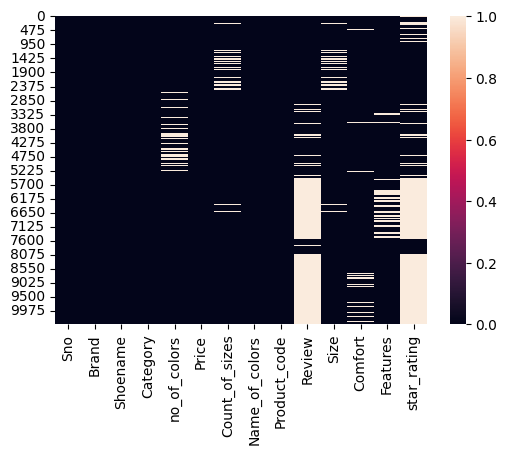

In [ ]:
#Visualizing it
plt.figure(figsize=(6,4))
sns.heatmap(df.isnull())
plt.show()

In [ ]:
#Categorical Values
df['Category'].fillna(df['Category'].mode()[0],inplace=True)

constant_value = 'Not Available'
df['Features'].fillna(constant_value, inplace=True)
df['Name_of_colors'].fillna(df['Name_of_colors'].mode()[0],inplace=True)
df['Comfort'].fillna(constant_value,inplace=True)
df['Product_code'].fillna(constant_value,inplace=True)

In [ ]:
#Checking missing values again
df.isnull().sum()

Sno                  0
Brand                0
Shoename             0
Category             0
no_of_colors       709
Price                0
Count_of_sizes     721
Name_of_colors       0
Product_code         0
Review            4957
Size               722
Comfort              0
Features             0
star_rating       5220
dtype: int64

<div style="background-color: #E6E6FA; padding: 10px;">

<h3>Observations:</h3>
    
* During the inspection process, we identified there are Total 14901 Missing Values are present in our Dataframe
<br>
<br>
* To address this issue, we chose to fill the missing values of the categorical column such as 'category' and 'Name_ of_colors' column using mode and for others categorical column such as ''Features', 'Comfort', 'Review', and 'Product_code' with constant value "Not Available".
<br>
<br>
* we will investigate for float and integer columns how to treat them.

</div>

In [ ]:
# Checking Unique values in columns
for i in df.columns:
    print(i)
    print(df[i].unique())
    print('*'*50)

Sno
[   0    1    2 ... 2979 2980 2981]
**************************************************
Brand
['Nike' 'Adidas' 'Puma' 'Skechers' 'Columbia' 'Woodland']
**************************************************
Shoename
["Air Force 1 '07" 'Air Max 1' 'Air Max 90' ... 'Blue Pumps For Women'
 'LBLUE High Ankle Sneakers For Women' 'Black/Wine Sneaker For Men']
**************************************************
Category
['Men' 'Women' 'Unisex']
**************************************************
no_of_colors
[ 2.  5.  1.  3.  4.  6.  8.  7.  9. 11. 10. nan 15. 14.  0. 13.]
**************************************************
Price
['7 495.00' '12 795.00' '11 895.00' ... '14 246' '1 746' '2 457']
**************************************************
Count_of_sizes
['13.0' '17.0' '15.0' '14.0' '9.0' '10.0' '11.0' '6.0' '5.0' '8.0' '12.0'
 '7.0' '2.0' '3.0' '16.0' '1.0' '18.0' '4.0' nan 'Not Loading' '7' '4' '5'
 '3' '6' '2' '0' '1' '8' 'Na' '0.0']
**************************************************
Name

In [ ]:
# Checking value counts
for i in df.columns:
    print(i)
    print(df[i].value_counts())
    print('*'*50)

Sno
0       6
156     6
144     6
145     6
146     6
       ..
2718    1
2717    1
2716    1
2715    1
2981    1
Name: Sno, Length: 2982, dtype: int64
**************************************************
Brand
Adidas      2982
Nike        2498
Woodland    2380
Puma        2055
Skechers     297
Columbia     225
Name: Brand, dtype: int64
**************************************************
Shoename
Revolution 6                     42
Pegasus 40                       40
Victori One                      38
Winflo 10                        38
ULTRABOOST LIGHT SHOES           32
                                 ..
Snaype Casual Sneaker For Men     1
Black/Lgrey Slip Shoe For Men     1
COURT SILK SHOES                  1
Camel Hiking Boots For Men        1
Black/Wine Sneaker For Men        1
Name: Shoename, Length: 3729, dtype: int64
**************************************************
Category
Men       6583
Women     3068
Unisex     786
Name: Category, dtype: int64
******************************

In [ ]:
# Dropping redundant columns
df.drop(['Features', 'Comfort', 'Sno', 'Size'], axis=1, inplace=True)

# Checking Dimesion of the Dataframe
df.shape

(10437, 10)

<div style="background-color: #E6E6FA; padding: 10px;">

<h3>Observations:</h3>
    
* The dataset originally contained 10528 rows and 14 columns.
* Redundant columns, namely 'Features', 'Comfort', 'sno' were identified and subsequently dropped.
* The dataset now consists of 10528 rows and 11 columns.

1. **Brand:**
   - The 'Brand' column consists of a variety of popular brands such as 'Nike,' 'Adidas,' 'Puma,' 'Skechers,' 'Columbia,' and 'Woodland,' suggesting diversity in the selection of footwear brands.
<br>
<br>
2. **Shoename:**
   - The 'Shoename' column contains a diverse range of shoe names, including popular models like "Air Force 1 '07," "Air Max 1," and unique names like "Blue Pumps For Women" and "LBLUE High Ankle Sneakers For Women."
<br>
<br>
3. **Category:**
   - The 'Category' column classifies the footwear into categories such as 'Men,' 'Women,' and 'Unisex,' providing insights into the target audience for each product.
<br>
<br>
4. **No_of_colors:**
   - The 'No_of_colors' column displays the count of colors available for each product, with a range from 1 to 15. Some entries are marked as 'nan,' suggesting missing values.
<br>
<br>
5. **Price:**
   - The 'Price' column contains a variety of price representations, including both numeric values and those with currency symbols. Some entries may need preprocessing to ensure uniform formatting.
<br>
<br>
6. **Count_of_sizes:**
   - The 'Count_of_sizes' column indicates the quantity of sizes available for each product, with a range from 0 to 18. 'Not Loading' and 'Na' entries suggest potential data quality issues or missing values.
<br>
<br>
7. **Name_of_colors:**
   - The 'Name_of_colors' column provides diverse color names for the products, ranging from specific shades like 'White/White' to more general descriptors like 'GOLDEN.'
<br>
<br>
8. **Product_code:**
   - The 'Product_code' column contains unique codes assigned to each product, ensuring individual identification in the dataset.
<br>
<br>
9. **Review:**
    - The 'Review' column captures the number of reviews received for each product, with a mix of numeric values and 'Not Available' entries. Some entries also contain a large number, possibly indicating a total count.
<br>
<br>    
10. **Star Rating Diversity:**
       - The distribution of star ratings includes a variety of values, with higher counts for ratings like 4.8, 4.7, and 4.6. The presence of '0.0' and 'nan' indicates the need for careful consideration when analyzing product ratings.
<br>
<br>
These observations provide an overview of the key features in each column of the dataset, showcasing the diversity and potential data quality considerations for further analysis.

</div>

## Treating Missing Values of Numerical columns

#### a. No_Of_ Colors column

In [ ]:
# Handling Missing Values of no_of_colors
df['no_of_colors'].fillna(1, inplace=True)

In [ ]:
# Unique_values in no_of_colors column
df['no_of_colors'].unique()

array([ 2.,  5.,  1.,  3.,  4.,  6.,  8.,  7.,  9., 11., 10., 15., 14.,
        0., 13.])

In [ ]:
# Replace both 0 and 0.0 with 1 as it means the same
df['no_of_colors'].replace({0: 1, 0.0: 1}, inplace=True)

In [ ]:
# Converting it to integer
df['no_of_colors'] = df['no_of_colors'].astype(int)

In [ ]:
df['no_of_colors'].unique()

array([ 2,  5,  1,  3,  4,  6,  8,  7,  9, 11, 10, 15, 14, 13])

#### b. Count_of_sizes column

In [ ]:
constant_value = 0

# Replace both 0 and 0.0 with 1
df['Count_of_sizes'].replace({0: 1, 0.0: 1}, inplace=True)

# Replace 'Not Loading' with the constant value
df['Count_of_sizes'].replace({'Not Loading': constant_value}, inplace=True)

# Convert the column to numeric, replace NaN with constant, and then convert to integer
df['Count_of_sizes'] = pd.to_numeric(df['Count_of_sizes'], errors='coerce').fillna(constant_value).astype(int)

In [ ]:
df['Count_of_sizes'].unique()

array([13, 17, 15, 14,  9, 10, 11,  6,  5,  8, 12,  7,  2,  3, 16,  1, 18,
        4,  0])

#### c. Handling Star_rating column

In [ ]:
# Handling star_rating

df['star_rating'].unique()

array([nan, 4.8, 4.7, 4.6, 5. , 4.3, 4.1, 4.5, 0. , 4.4, 4.9, 3.7, 2. ,
       2.6, 3.5, 4. , 3.9, 3. , 4.2, 3.8, 1. , 2.8, 3.6, 2.7, 2.5, 3.2,
       3.4, 1.3, 3.3, 1.8, 2.3, 1.5])

In [ ]:
# Handl star_rating
df['star_rating'].fillna(0, inplace=True)

In [ ]:
# Handling star_rating

df['star_rating'].unique()

array([0. , 4.8, 4.7, 4.6, 5. , 4.3, 4.1, 4.5, 4.4, 4.9, 3.7, 2. , 2.6,
       3.5, 4. , 3.9, 3. , 4.2, 3.8, 1. , 2.8, 3.6, 2.7, 2.5, 3.2, 3.4,
       1.3, 3.3, 1.8, 2.3, 1.5])

In [ ]:
# Define a custom mapping function to handle star_rating column

def map_star_rating(rating):
    if pd.isnull(rating):
        return 'Not Available'
    elif rating == 1:
        return 'Poor'
    elif rating == 2:
        return 'Average'
    elif rating == 3:
        return 'Good'
    elif rating == 4:
        return 'Excellent'
    else:
        return 'Not Available'  # Handle other cases

# Apply the mapping function to create the 'Rating' column
df['Rating'] = df['star_rating'].apply(map_star_rating)

In [ ]:
df['Rating'].value_counts()

Not Available    10115
Excellent          237
Good                37
Poor                27
Average             21
Name: Rating, dtype: int64

In [ ]:
df.drop('star_rating', axis=1, inplace=True)

#### d. Handling Price Column

In [ ]:
df['Price'].value_counts()

13 995.00    105
11 999.00    103
14 995.00    100
10 999.00     96
11 895.00     93
            ... 
2 012          1
1 293          1
1 751          1
17 287.00      1
2 457          1
Name: Price, Length: 1042, dtype: int64

In [ ]:
df['Price'] = df['Price'].replace({' ': '', "'": '',",":''}, regex=True)

In [ ]:
df['Price'].unique()

array(['7495.00', '12795.00', '11895.00', ..., '14246', '1746', '2457'],
      dtype=object)

In [ ]:
df['Price'] = df['Price'].astype(float)

In [ ]:
df['Price'].fillna(df['Price'].median(), inplace=True)

#### e. Handling Review column

In [ ]:
constant = 0.0
df['Review'].fillna(constant, inplace=True)

In [ ]:
df['Review'].astype(int)

0        1311
1          88
2           3
3          22
4           8
         ... 
10432       0
10433       0
10434       0
10435       0
10436       0
Name: Review, Length: 10437, dtype: int32

In [ ]:
df.isnull().sum()

Brand             0
Shoename          0
Category          0
no_of_colors      0
Price             0
Count_of_sizes    0
Name_of_colors    0
Product_code      0
Review            0
Rating            0
dtype: int64

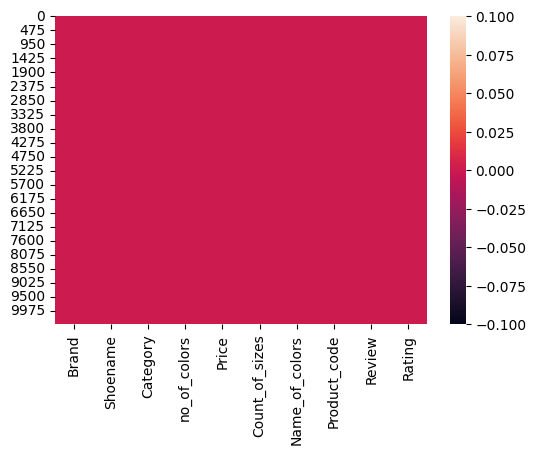

In [ ]:
#Visualizing it
plt.figure(figsize=(6,4))
sns.heatmap(df.isnull())
plt.show()

<div style="background-color:  #E6E6FA; padding: 20px;">
    
<h3>Observations:</h3>
    
* **no_of_colors:**
    - The 'no_of_colors' column represents the count of colors available for each item. A key insight from domain knowledge is that a count of 1 corresponds to the absence of color information, treated as missing data. To address this, missing values have been imputed with 1.
<br>
<br>
* **Count_of_sizes:**
    - Understanding the domain context, the 'Count_of_sizes' column for Adidas products was not available due to website loading issues, and it was filled with a constant value of 0. Additionally, instances where 'Count_of_sizes' had values of 0 and 0.0, likely indicating out-of-stock items, were replaced with 1.
<br>
<br>
* **Star_rating:**
    - The 'Star_rating' column ranges from 1 to 5, with NA indicating products without reviews. A new column, 'Rating', was derived to categorize the star ratings into qualitative labels – 'Poor', 'Average', 'Good', and 'Excellent'. Not Available values were assigned the label 'Not Rated', represented by 0.
<br>
<br>
* **Price:**
    - The 'Price' column, initially recognized as containing float values, appeared as object type due to the presence of commas and apostrophes. These non-numeric characters were removed, and missing values were imputed with the median. Considering the presence of outliers in the column, median imputation provides a robust solution.
<br>
<br>
* **Review:**
    - The 'Review' column signifies the number of reviews for each product. Instances with 'Not Available' values were replaced with a constant value of 0 to facilitate a comprehensive analysis of the review data.
    
</div>

<div style="text-align: left; background-color: #000080; padding: 10px;">
    <h3 style="color: #ffffff;">3.6. Separating Categorical and numerical columns</h3>
</div>

In [ ]:
df.dtypes

Brand              object
Shoename           object
Category           object
no_of_colors        int32
Price             float64
Count_of_sizes      int32
Name_of_colors     object
Product_code       object
Review            float64
Rating             object
dtype: object

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10437 entries, 0 to 10436
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Brand           10437 non-null  object 
 1   Shoename        10437 non-null  object 
 2   Category        10437 non-null  object 
 3   no_of_colors    10437 non-null  int32  
 4   Price           10437 non-null  float64
 5   Count_of_sizes  10437 non-null  int32  
 6   Name_of_colors  10437 non-null  object 
 7   Product_code    10437 non-null  object 
 8   Review          10437 non-null  float64
 9   Rating          10437 non-null  object 
dtypes: float64(2), int32(2), object(6)
memory usage: 734.0+ KB


In [ ]:
#Seaparating Categrocial columns in train Dataframe
cat_col = df.select_dtypes(include='object').columns
print("Categorial columns in our train dataframe:\n",cat_col)

#Seaparating Numerical columns in train Dataframe
num_col = df.select_dtypes(include=['int32', 'float64']).columns
print("\nNumerical columns in our train dataframe:\n",num_col)

Categorial columns in our train dataframe:
 Index(['Brand', 'Shoename', 'Category', 'Name_of_colors', 'Product_code',
       'Rating'],
      dtype='object')

Numerical columns in our train dataframe:
 Index(['no_of_colors', 'Price', 'Count_of_sizes', 'Review'], dtype='object')


In [ ]:
df.shape

(10437, 10)

<div style="background-color: #E6E6FA; padding: 20px;">

### Observations:

* The dataframe consists of 10 columns and 10528 rows, with data types categorized into float64 (2 columns), int32 (2 columns), and object (6 columns).
* Following the separation of columns based on their nature, we have identified 4 numerical columns and 6 categorical columns within the dataframe.

</div>

<div style="text-align: left; background-color: #000080; padding: 10px;">
    <h3 style="color: #ffffff;">3.7. Statistical Summary</h3>
</div>

In [ ]:
df.describe()

,no_of_colors,Price,Count_of_sizes,Review
count,10437.000000,10437.000000,10437.000000,10437.000000
mean,3.002300,6405.728274,3.134138,86.439302
std,2.078425,4900.883218,3.670558,629.620847
min,1.000000,0.000000,0.000000,0.000000
25%,2.000000,2659.500000,0.000000,0.000000
50%,2.000000,4799.500000,2.000000,0.000000
75%,4.000000,8999.000000,6.000000,31.000000
max,15.000000,39999.000000,18.000000,19646.000000


<div style="background-color: #E6E6FA; padding: 10px;">

<h3>Observations:</h3>

The descriptive statistics for selected columns in the dataframe are as follows:

* **no_of_colors:**
- The number of colors ranges from 1 to 15, with an average of approximately 3 colors per item.
- The majority of items have 2 colors, as indicated by the median (50th percentile).

* **Price:**
- The prices of items vary significantly, with a minimum of 0 and a maximum of 39,999.
- The mean price is approximately 6,391.84, and the median (50th percentile) is 4,799.50.
- The presence of a minimum price of 0 suggests that some items might be available for free or have missing price information.

* **Count_of_sizes:**
- The count of sizes per item ranges from 0 to 18, with an average count of approximately 3 sizes.
- The majority of items have 2 sizes, as indicated by the median (50th percentile).
- The presence of a minimum count of sizes of 0 suggests that some items might be out of stock or have missing size information.

* **Review:**
- The number of reviews for items varies widely, ranging from 0 to 19,646.
- On average, items have around 86 reviews, but the median (50th percentile) is 0, indicating that many items have no reviews.
- The 75th percentile indicates that 30 reviews are present for items with reviews.

These statistics provide insights into the distribution and central tendency of the selected columns in the dataframe. The presence of minimum prices of 0 and minimum counts of sizes of 0 suggests potential data anomalies or missing information.
</div>

In [ ]:
# Checking the min value which 0.0
df[df['Price']==0.0]

,Brand,Shoename,Category,no_of_colors,Price,Count_of_sizes,Name_of_colors,Product_code,Review,Rating
7214,Puma,PWR XX Nitro Women's Training Shoes,Women,5,0.0,6,Puma White-Turquoise Surf,376969_12,0.0,Not Available


In [ ]:
# Checking the pice of similar product
df[df['Shoename'] == "PWR XX Nitro Women's Training Shoes"]

,Brand,Shoename,Category,no_of_colors,Price,Count_of_sizes,Name_of_colors,Product_code,Review,Rating
5788,Puma,PWR XX Nitro Women's Training Shoes,Women,5,5399.0,6,Puma Black-Puma White-Metallic Silver,376969_01,0.0,Not Available
5818,Puma,PWR XX Nitro Women's Training Shoes,Women,5,5219.0,4,Orchid Shadow-PUMA Black-PUMA Silver,376969_09,0.0,Not Available
5862,Puma,PWR XX Nitro Women's Training Shoes,Women,5,6749.0,0,Puma Black-Sunset Pink-Fizzy Apple\n: Sold Out,376969_02,0.0,Not Available
5904,Puma,PWR XX Nitro Women's Training Shoes,Women,5,5219.0,1,Puma White-Puma Black-Puma Team Gold,376969_04,0.0,Not Available
7212,Puma,PWR XX Nitro Women's Training Shoes,Women,5,5219.0,1,Puma White-Puma Black-Puma Team Gold,376969_04,0.0,Not Available
7213,Puma,PWR XX Nitro Women's Training Shoes,Women,5,5219.0,4,Orchid Shadow-PUMA Black-PUMA Silver,376969_09,0.0,Not Available
7214,Puma,PWR XX Nitro Women's Training Shoes,Women,5,0.0,6,Puma White-Turquoise Surf,376969_12,0.0,Not Available
7215,Puma,PWR XX Nitro Women's Training Shoes,Women,5,8999.0,6,PUMA Black-Garnet Rose-Fast Pink,376969_14,0.0,Not Available
7237,Puma,PWR XX Nitro Women's Training Shoes,Women,5,5399.0,6,Puma Black-Puma White-Metallic Silver,376969_01,0.0,Not Available


In [ ]:
df[df['Shoename'] == "PWR XX Nitro Women's Training Shoes"]['Price'].mean()

5269.111111111111

In [ ]:
# Changing the min price as it is mistake filling it average price of similar product
df.loc[df['Price'] == 0.0, 'Price'] = 5269.0

In [ ]:
df['Price'].min()

159.0

In [ ]:
df.describe()

,no_of_colors,Price,Count_of_sizes,Review
count,10437.000000,10437.000000,10437.000000,10437.000000
mean,3.002300,6406.233113,3.134138,86.439302
std,2.078425,4900.494667,3.670558,629.620847
min,1.000000,159.000000,0.000000,0.000000
25%,2.000000,2659.500000,0.000000,0.000000
50%,2.000000,4799.500000,2.000000,0.000000
75%,4.000000,8999.000000,6.000000,31.000000
max,15.000000,39999.000000,18.000000,19646.000000


<div style="background-color: #E6E6FA; padding: 10px;">

<h3>Observations:</h3>

* **Price:**
  - Upon inspection, we identified a shoe with an improbable minimum price of 0.0, which is likely an error. After investigating similar shoes, we observed a price range between 5219.0 and 8999.0
  - To rectify the error, we decided to fill the 0.0 value with the average price of shoes of a similar type.

Following this correction, the price column exhibits significant variability, with a mean price of approximately 6392.35. The prices in the dataset range from a minimum of 159 to a maximum of 39999.

</div>

<div style="text-align: left; background-color: #000080; padding: 10px;">
    <h3 style="color: #ffffff;">3.8. Data Visualization</h3>
</div>

## a. Univariate Analysis

### i. Categorical Data

In [ ]:
for i in cat_col:
    print(i)
    result = df.groupby(i).size().reset_index(name='Count')
    result['Percentage'] = (result['Count'] / len(df)) * 100
    print(result)
    print('=' * 100)

Brand
      Brand  Count  Percentage
0    Adidas   2982   28.571429
1  Columbia    225    2.155792
2      Nike   2498   23.934081
3      Puma   2055   19.689566
4  Skechers    297    2.845645
5  Woodland   2380   22.803488
Shoename
                                               Shoename  Count  Percentage
0                                 4DFWD 3 RUNNING SHOES     16    0.153301
1                                 4DFWD PULSE 2.0 SHOES      1    0.009581
2                                       ACG Moc Premium      2    0.019163
3                                ACG Mountain Fly 2 Low      6    0.057488
4                                         ACG Watercat+      2    0.019163
...                                                 ...    ...         ...
3724                ZoomX Dragonfly Bowerman Track Club      1    0.009581
3725                              Zora Women's Sneakers      1    0.009581
3726                      one8 Virat Kohli Men's Slides      4    0.038325
3727  one8 Virat K

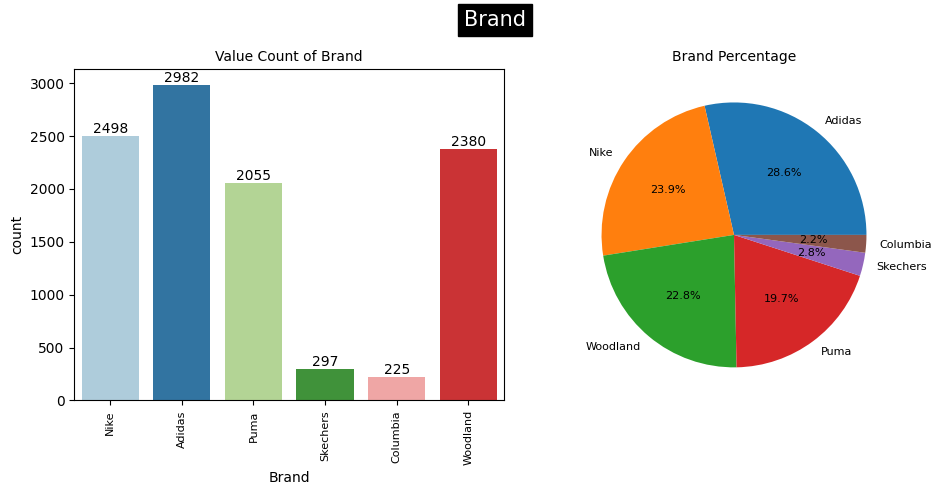

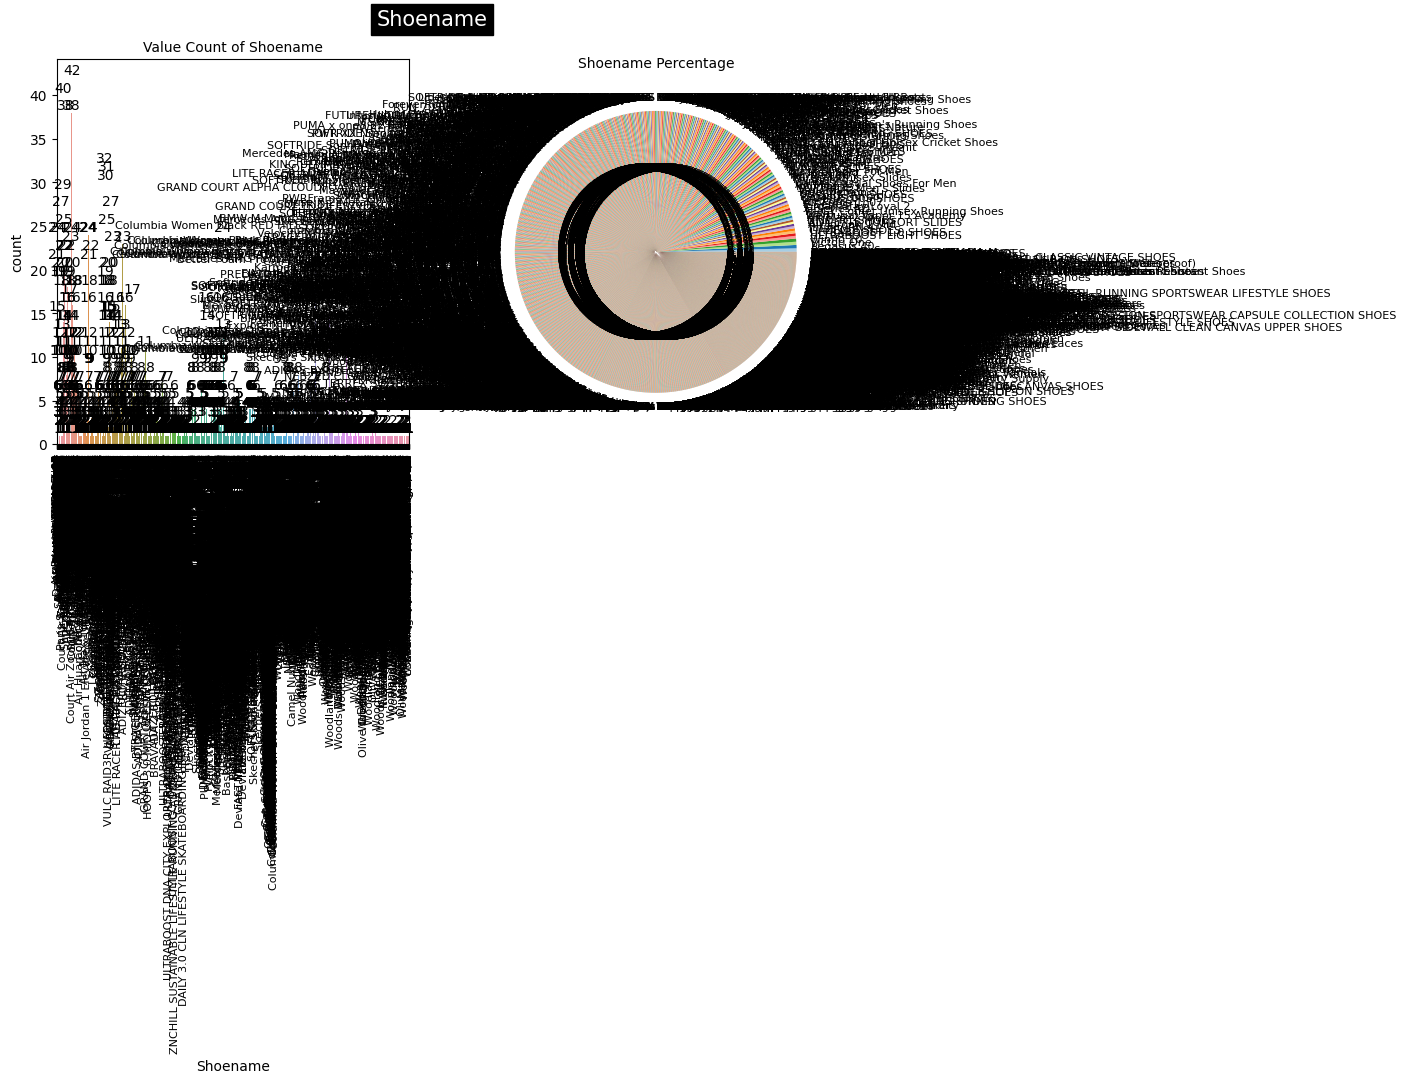

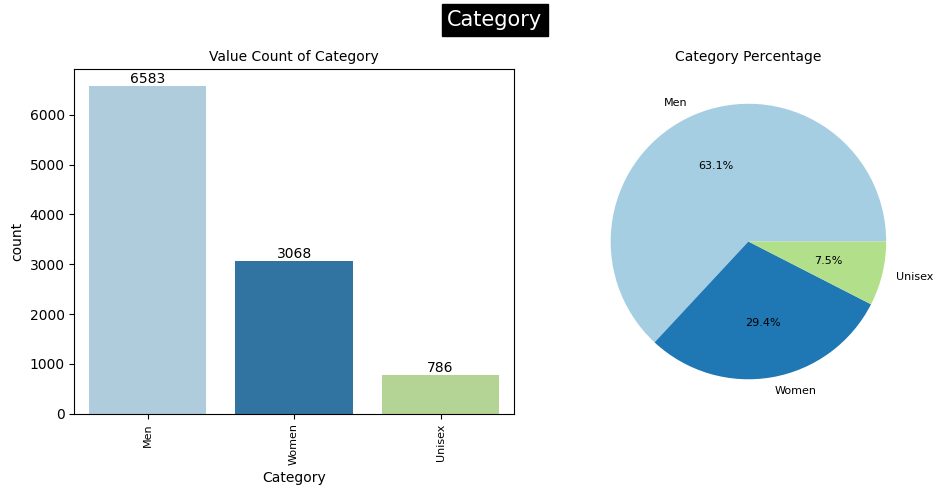

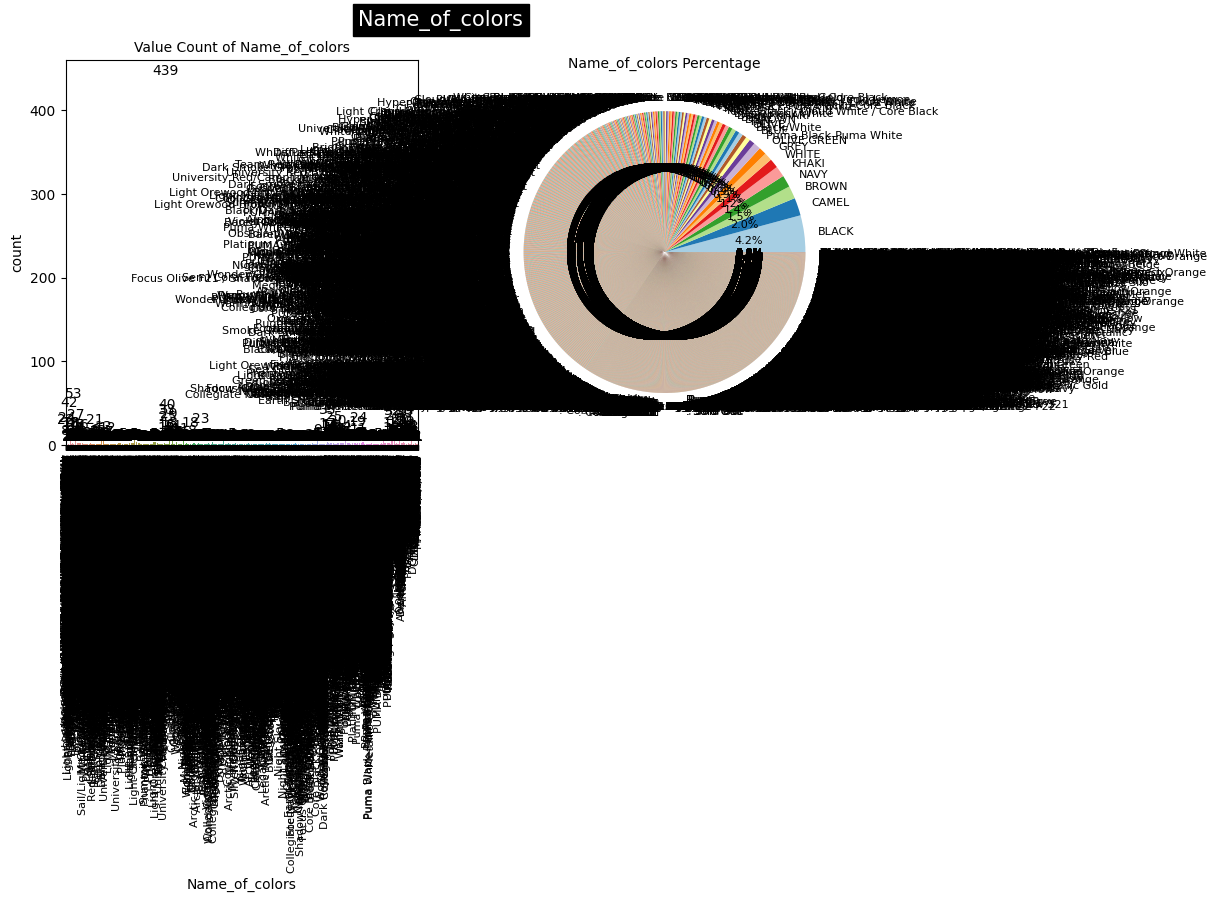

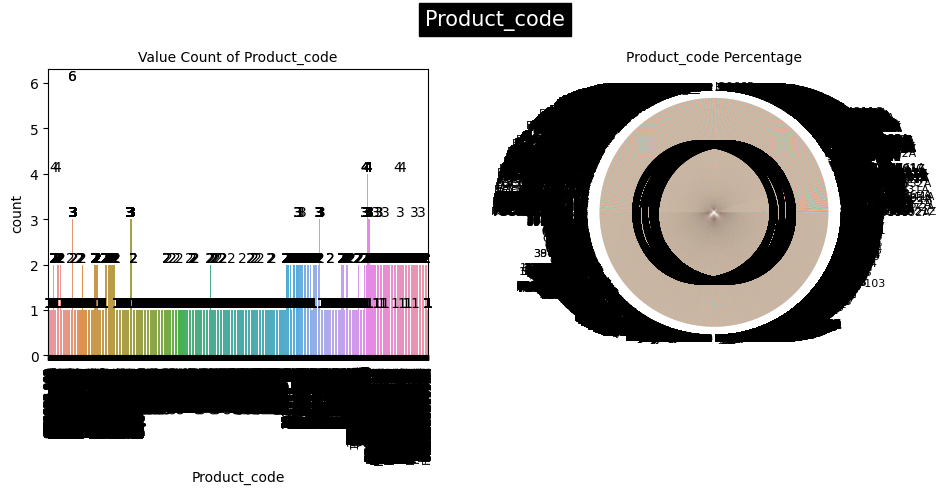

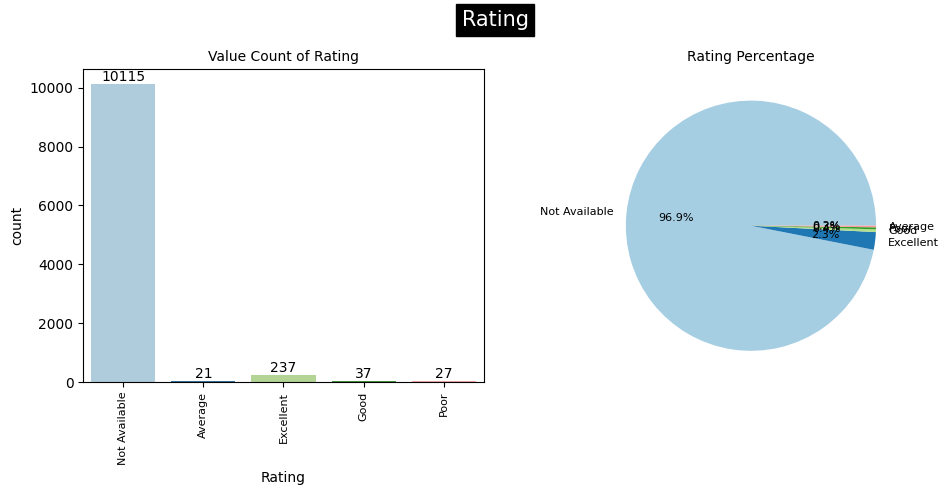

In [ ]:
#Iterate over Categorical column
for i, column in enumerate(cat_col):

    fig, axes = plt.subplots(1, 2, figsize=(10,5))
    sns.set_palette("Paired")

    # Plot the countplot
    ax = sns.countplot(x=column, data=df, ax=axes[0])
    for container in ax.containers:
        ax.bar_label(container)
    ax.set_title(f'Value Count of {column}', fontsize=10)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90, fontsize=8)

    # Plot the pie chart
    column_counts = df[column].value_counts()
    ax = axes[1]
    ax.pie(column_counts, labels=column_counts.index, autopct='%0.1f%%', textprops={'fontsize': 8})
    ax.set_title(f'{column} Percentage', fontsize=10)

    fig.suptitle(column, fontsize=15, backgroundcolor='black',color='white')
    plt.tight_layout()
    plt.show()

<div style="background-color: #E6E6FA; padding: 10px;">

<h3>Observations:</h3>

#### Brand
- **Adidas:** Represents 28.57% of the total count, with 2982 instances.
- **Columbia:** Constitutes 2.16% of the total count, with 225 instances.
- **Nike:** Holds 23.93% of the total count, with 2498 instances.
- **Puma:** Accounts for 19.69% of the total count, with 2055 instances.
- **Skechers:** Represents 2.85% of the total count, with 297 instances.
- **Woodland:** Represents 22.80% of the total count, with 2380 instances.

#### Shoename
- The dataset contains 3729 unique shoename entries.
- The most frequent shoename is "4DFWD 3 RUNNING SHOES" with a count of 16, constituting 0.15% of the total.

#### Category
- **Men:** Represents 63.07% of the total count, with 6583 instances.
- **Unisex:** Constitutes 7.53% of the total count, with 786 instances.
- **Women:** Represents 29.40% of the total count, with 3068 instances.

#### Name_of_colors
- The dataset contains 5134 unique entries for name_of_colors.
- Some examples of name_of_colors include "ANTHRACITE," "APRICOT/BLACK," "AQUA," and "black-white."
- The most frequent color is "peacoat-white" with a count of 6, constituting 0.06% of the total.

#### Product_code
- The dataset contains 7732 unique product codes.
- Examples of product codes include "BL0155-012," "BL0155-053," and "IV4475."
- Most product codes have a low count, with many occurring only once.

#### Rating
- **Average:** Represents 0.20% of the total count, with 21 instances.
- **Excellent:** Constitutes 2.27% of the total count, with 237 instances.
- **Good:** Represents 0.35% of the total count, with 37 instances.
- **Not Available:** Dominates the dataset, accounting for 96.91% of the total count, with 10115 instances.
- **Poor:** Represents 0.26% of the total count, with 27 instances.

These observations provide insights into the distribution and characteristics of the data across different categories. Note that the "Not Available" rating is predominant in the dataset.

</div>

### ii. Univariate Analysis on Shoename

In [ ]:
shoename_counts = df['Shoename'].value_counts().sort_values(ascending=False)
total_entries = len(df)

# Calculate the percentage for each shoename
percentage_per_shoe = (shoename_counts / total_entries) * 100

# Combine counts and percentages into a DataFrame
result_df = pd.DataFrame({'Count': shoename_counts, 'Percentage': percentage_per_shoe})
result_df.head(10)

,Count,Percentage
Revolution 6,42,0.402414
Pegasus 40,40,0.383252
Victori One,38,0.364089
Winflo 10,38,0.364089
ULTRABOOST LIGHT SHOES,32,0.306602
ULTRABOOST 1.0 SHOES,31,0.297020
GAZELLE SHOES,30,0.287439
InfinityRN 4,29,0.277858
Air Jordan 1 Mid,27,0.258695
ADILETTE COMFORT SLIDES,27,0.258695


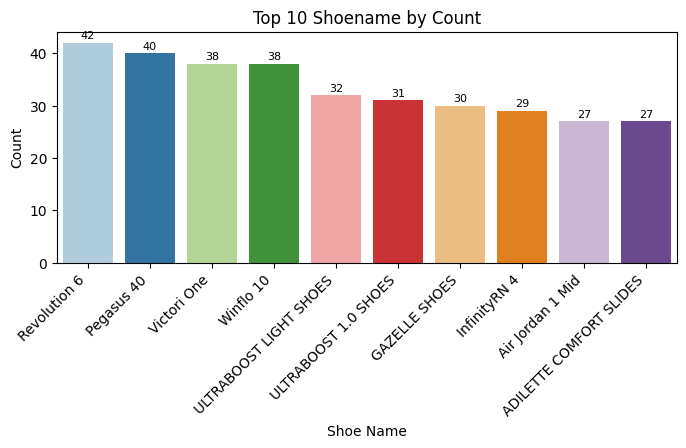

In [ ]:
top_10_shoes = result_df.head(10)

# Plotting
plt.figure(figsize=(8, 3))
ax = sns.barplot(x=top_10_shoes .index, y='Count', data=top_10_shoes , palette='Paired')
plt.title('Top 10 Shoename by Count')
plt.xlabel('Shoe Name')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')

# Show values on the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height():.0f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=8, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.show()

<div style="background-color: #E6E6FA; padding: 10px;">

<h3>Observations:</h3>

1. **Revolution 6:**
   - Count: 42
   - Percentage: 0.40%
   - This shoe name has a relatively higher count compared to others.

2. **Pegasus 40:**
   - Count: 40
   - Percentage: 0.38%
   - Similar to Revolution 6, Pegasus 40 has a notable count in the dataset.

3. **Victori One:**
   - Count: 38
   - Percentage: 0.36%
   - Victori One is another shoe name with a substantial presence in the dataset.

4. **Winflo 10:**
   - Count: 38
   - Percentage: 0.36%
   - Winflo 10 shares a similar count with Victori One.

5. **ULTRABOOST LIGHT SHOES:**
   - Count: 32
   - Percentage: 0.31%
   - ULTRABOOST LIGHT SHOES is a notable shoe name with a reasonable count.

6. **ULTRABOOST 1.0 SHOES:**
   - Count: 31
   - Percentage: 0.30%
   - This shoe name is also present in the dataset with a recognizable count.

7. **GAZELLE SHOES:**
   - Count: 30
   - Percentage: 0.29%
   - GAZELLE SHOES is among the shoe names with a relatively balanced count.

8. **InfinityRN 4:**
   - Count: 29
   - Percentage: 0.28%
   - InfinityRN 4 has a slightly lower count compared to other shoe names.

9. **Air Jordan 1 Mid:**
   - Count: 27
   - Percentage: 0.26%
   - Air Jordan 1 Mid is present in the dataset but with a lower count.

10. **ADILETTE COMFORT SLIDES:**
    - Count: 27
    - Percentage: 0.26%
    - ADILETTE COMFORT SLIDES shares a similar count with Air Jordan 1 Mid.

These observations provide insights into the popularity or prevalence of specific shoe names in the dataset. The percentages indicate the proportion of each shoe name relative to the total count of shoename entries in the dataset.
</div>

### iii. Univariate Analysis on Name_ of_colors

In [ ]:
top10colors_counts = df['Name_of_colors'].value_counts().sort_values(ascending=False)
total_entries = len(df)

# Calculate the percentage for each name of the color
percentage_per_color = (top10colors_counts / total_entries) * 100

# Combine counts and percentages into a DataFrame
result_df = pd.DataFrame({'Count': top10colors_counts, 'Percentage': percentage_per_color})
result_df.head(10)

,Count,Percentage
BLACK,439,4.206190
CAMEL,213,2.040816
BROWN,152,1.456357
NAVY,143,1.370126
KHAKI,130,1.245569
WHITE,111,1.063524
GREY,97,0.929386
OLIVE GREEN,91,0.871898
Puma Black-Puma White,86,0.823992
BLUE,68,0.651528


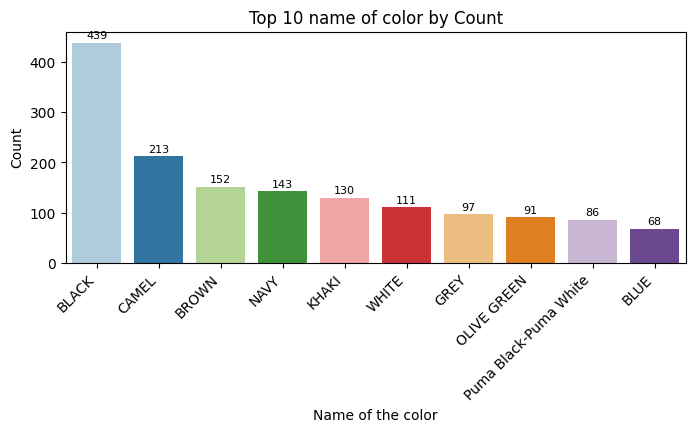

In [ ]:
top_10_color = result_df.head(10)

# Plotting
plt.figure(figsize=(8, 3))
ax = sns.barplot(x=top_10_color .index, y='Count', data=top_10_color, palette='Paired')
plt.title('Top 10 name of color by Count')
plt.xlabel('Name of the color')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')

# Show values on the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height():.0f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=8, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.show()

<div style="background-color: #E6E6FA; padding: 10px;">

<h3>Observations:</h3>

1. **BLACK:** Predominant color, constituting 4.21% of the dataset with 439 instances.
  
2. **CAMEL:** Second most common color, present in 2.04% of entries with 213 instances.

3. **BROWN:** Notable color choice, representing 1.46% of the dataset with 152 occurrences.

4. **NAVY:** Appears in the dataset, comprising 1.37% of entries with 143 instances.

5. **KHAKI:** Present in 1.25% of entries, with 130 instances.

6. **WHITE:** Represents 1.06% of the dataset with 111 instances.

7. **GREY:** Observed in 0.93% of entries, with 97 instances.

8. **OLIVE GREEN:** Constitutes 0.87% of the dataset with 91 occurrences.

9. **Puma Black-Puma White:** Specific color combination from Puma, making up 0.82% with 86 instances.

10. **BLUE:** Appears in 0.65% of entries, with 68 instances.

These observations provide insights into the distribution of different shoe colors, highlighting the most common ones and their respective percentages in the dataset.

</div>

### iv. Univariate Analysis on Product_code

In [ ]:
top10product_counts = df['Product_code'].value_counts().sort_values(ascending=False)
total_entries = len(df)

# Calculate the percentage for each name of the color
percentage_per_color = (top10product_counts / total_entries) * 100

# Combine counts and percentages into a DataFrame
result_df = pd.DataFrame({'Count': top10product_counts, 'Percentage': percentage_per_color})
result_df.head(10)

,Count,Percentage
DX9012-006,6,0.057488
DZ3355-106,6,0.057488
BL5953-471,4,0.038325
414571-160,4,0.038325
FGC0Q6042372A,4,0.038325
DR8884-001,4,0.038325
BM5371-020,4,0.038325
BM5371-384,4,0.038325
BL5953-036,4,0.038325
BM5371-231,4,0.038325


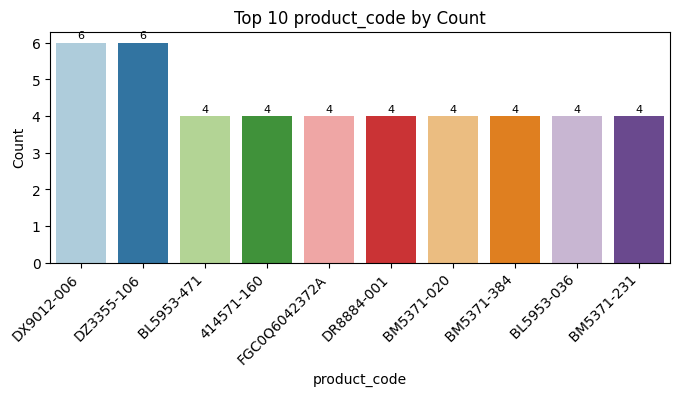

In [ ]:
top_10_code = result_df.head(10)

# Plotting
plt.figure(figsize=(8, 3))
ax = sns.barplot(x=top_10_code.index, y='Count', data=top_10_code, palette='Paired')
plt.title('Top 10 product_code by Count')
plt.xlabel('product_code')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')

# Show values on the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height():.0f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=8, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.show()

<div style="background-color: #E6E6FA; padding: 10px;">

<h3>Observations:</h3>

* Two product codes, DX9012-006 and DZ3355-106, stand out with a count of 6 each, individually representing 0.057% of the dataset, suggesting a higher prevalence compared to other product codes.
    
* Multiple product codes, including DX9012-006, DZ3355-106, BL5953-471, 414571-160, FGC0Q6042372A, DR8884-001, BM5371-020, BM5371-384, BL5953-036, and BM5371-231, each appear four times in the dataset, collectively constituting 0.038% each.
</div>

### iv. Univariate Analysis on Numerical columns

In [ ]:
for i in num_col:
    print(i)
    result = df.groupby(i).size().reset_index(name='Count')
    result['Percentage'] = (result['Count'] / len(df)) * 100
    print(result)
    print('=' * 100)

no_of_colors
    no_of_colors  Count  Percentage
0              1   2202   21.098017
1              2   3289   31.512887
2              3   2188   20.963879
3              4    990    9.485484
4              5    543    5.202644
5              6    435    4.167864
6              7    253    2.424068
7              8    227    2.174954
8              9    163    1.561751
9             10     52    0.498227
10            11     67    0.641947
11            13     12    0.114976
12            14      1    0.009581
13            15     15    0.143719
Price
       Price  Count  Percentage
0      159.0      1    0.009581
1      166.0      1    0.009581
2      177.0      1    0.009581
3      184.0      1    0.009581
4      267.0      1    0.009581
..       ...    ...         ...
934  27999.0      4    0.038325
935  29999.0      9    0.086232
936  34999.0      5    0.047906
937  37999.0      3    0.028744
938  39999.0      1    0.009581

[939 rows x 3 columns]
Count_of_sizes
    Count_of_sizes

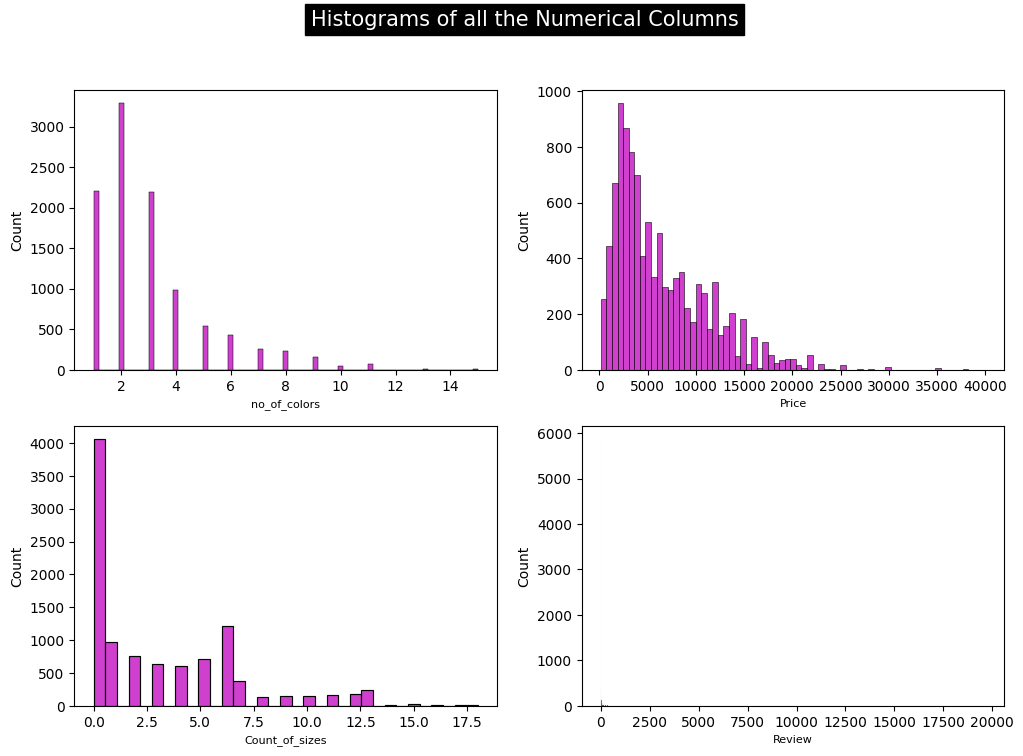

In [ ]:
#Visiualizing it using Histogram
plt.figure(figsize=(12,8), facecolor='white')
# Initialize plotnumber for subplot
plotnumber = 1

# Loop through numerical columns and plot histograms
for column in num_col:
    if plotnumber <= 4:
        ax = plt.subplot(2, 2, plotnumber)
        sns.histplot(df[column], color='m')
        plt.xlabel(column, fontsize=8)
    plotnumber += 1
plt.suptitle("Histograms of all the Numerical Columns", fontsize=15, backgroundcolor='black', color='white')
plt.show()

<div style="background-color: #E6E6FA; padding: 10px;">

<h3>Observations:</h3>

#### Number of Colors
- **1 Color:** Most common, with 2202 instances, comprising 21.10% of the dataset.
- **2 Colors:** Prevails in 31.51% of entries, with 3289 occurrences.
- **3 Colors:** Represents 20.96% of the dataset, with 2188 instances.
- **4 Colors:** Observed in 9.49% of entries, totaling 990 instances.
- **5 Colors:** Constitutes 5.20% of the dataset, with 543 occurrences.

#### Price
- The dataset includes prices ranging from 159.0 to 39999.0.
- **Most Frequent Prices:**
  - 2799.0, 29999.0, and 34999.0 have 4, 9, and 5 occurrences, respectively.

#### Count of Sizes
- **No Size Information:** The majority of entries (38.90%) lack information on size counts.
- **Entries with Sizes:** Entries with size information vary, with occurrences ranging from 1 to 18.

#### Review
- **No Reviews (0.0):** Dominates the dataset, constituting 50.85% of entries, with 5307 instances.
- **Low Reviews (1.0 to 4.0):** Entries with reviews ranging from 1.0 to 4.0 constitute a smaller portion of the dataset.

These observations provide insights into the distribution of color options, pricing, size information, and customer reviews within the dataset.
</div>

## b. Univariate Analysis

### i. Comparing First Target (Price) column with Categorical Columns

In [ ]:
# Iterate through each categorical column
for col in cat_col:

    # Group by 'Price' and the current categorical column
    counts = df.groupby(['Price', col])[col].count()

    # Calculate the total count for each category in the current column
    total_counts = df.groupby(col)['Price'].count()

    # Calculate the percentage of 'Rating' for each category in the current column
    percentages = (counts / total_counts * 100).round(2)

    # Create a DataFrame to display the counts and percentages
    cat_df = pd.concat([counts, percentages], axis=1, keys=['Count', 'Percentage'])

    # Print the results
    print(cat_df)
    print('*'*60)

                  Count  Percentage
Price   Brand                      
159.0   Woodland      1        0.04
166.0   Woodland      1        0.04
177.0   Woodland      1        0.04
184.0   Woodland      1        0.04
267.0   Woodland      1        0.04
...                 ...         ...
29999.0 Adidas        9        0.30
34999.0 Adidas        4        0.13
        Puma          1        0.05
37999.0 Adidas        3        0.10
39999.0 Adidas        1        0.03

[1062 rows x 2 columns]
************************************************************
                                           Count  Percentage
Price   Shoename                                            
159.0   Turquoise Flip-Flop For Men            1       50.00
166.0   Turquoise/Black Flip-Flop For Men      1      100.00
177.0   Turquoise/Grey Flip-Flop For Men       1      100.00
184.0   Turquoise Flip-Flop For Men            1       50.00
267.0   Red Flip-Flop For Men                  1       33.33
...                

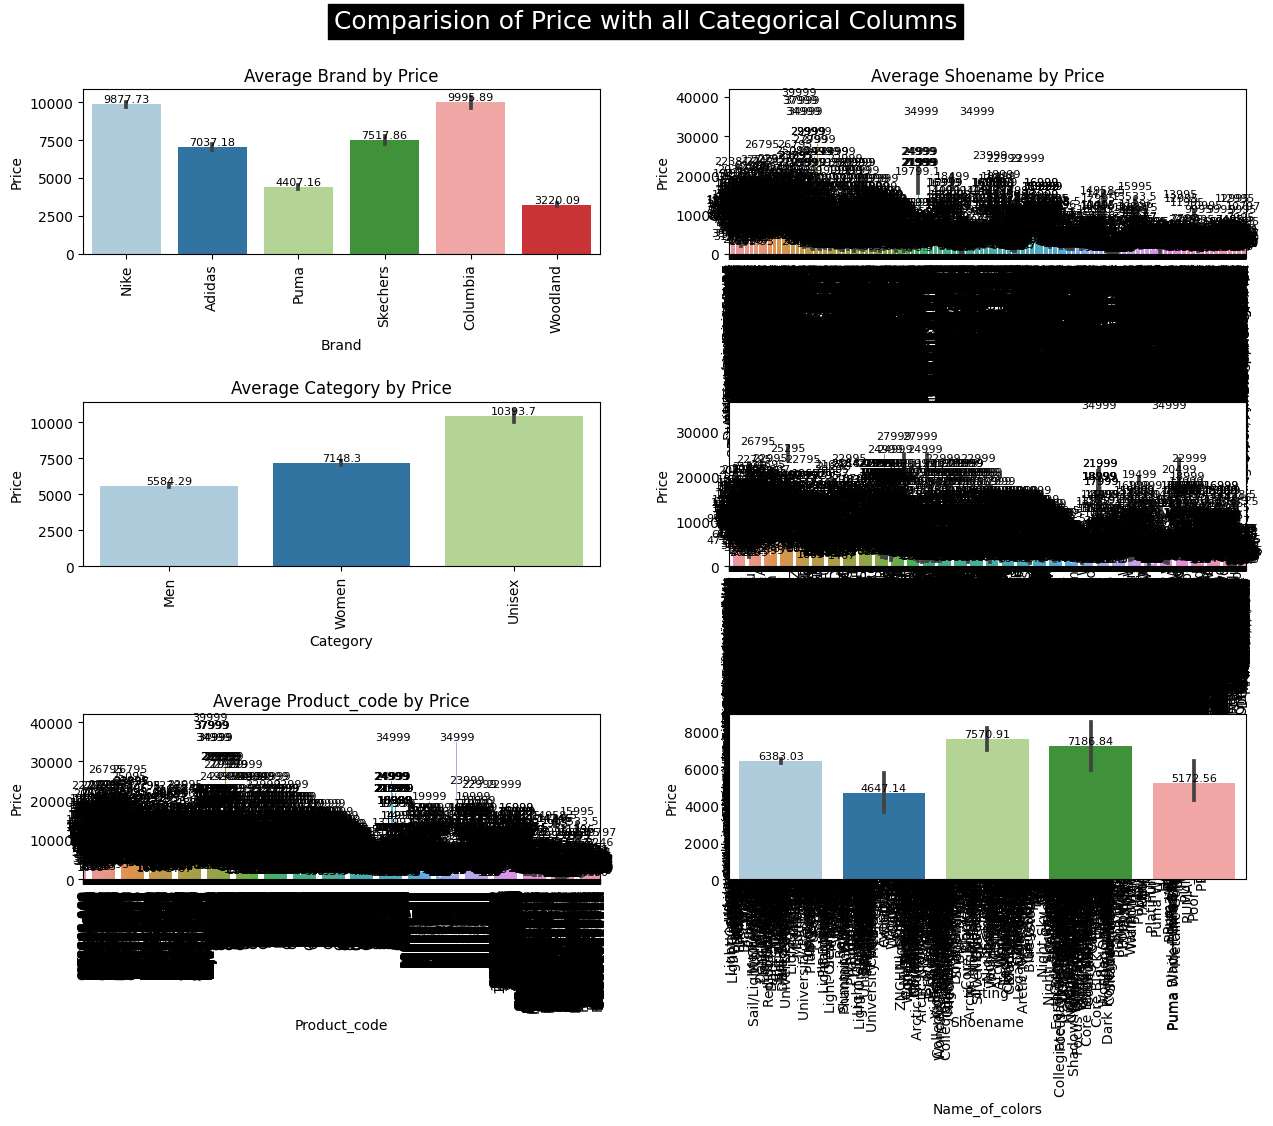

In [ ]:
# Visualizing it:
plt.figure(figsize=(15, 10))
plt.suptitle("Comparision of Price with all Categorical Columns", fontsize=18, backgroundcolor='pink', color='white')

for i, col in enumerate(cat_col):
    plt.subplot(3, 2, i+1)

    # Create a side-by-side bar plot for the current numerical column
    ax = sns.barplot(x=col, y='Price', data=df)

    for container in ax.containers:
        ax.bar_label(container, fontsize=8)

    plt.title(f"Average {col} by Price", fontsize=12)
    plt.xlabel(f"{col}")
    plt.ylabel("Price")

    plt.xticks(rotation=90)

plt.tight_layout()
plt.subplots_adjust(top=0.9, hspace=0.9, wspace=0.25)
plt.show()

In [ ]:
# price vs Shoename
pd.crosstab(df['Price'], df['Shoename'])

Shoename,4DFWD 3 RUNNING SHOES,4DFWD PULSE 2.0 SHOES,ACG Moc Premium,ACG Mountain Fly 2 Low,ACG Watercat+,ACME SHOES,ADI ACE SHOES`,ADI CHIC SHOES,ADI DASH SHOES,ADI EASE SHOES,...,Zoom Mercurial Superfly 9 Elite KM FG,Zoom Mercurial Vapor 15 Academy KM MG,Zoom Metcon Turbo 2,Zoom Superfly Elite 2,Zoom Vomero 5,ZoomX Dragonfly Bowerman Track Club,Zora Women's Sneakers,one8 Virat Kohli Men's Slides,one8 Virat Kohli SOFTRIDE Premier Unisex Walking Shoes,x MMW 005
Price,,,,,,,,,,,,,,,,,,,,,
159.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
166.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
177.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
184.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
267.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27999.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
29999.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
34999.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# price vs Name_of_colors
pd.crosstab(df['Price'], df['Name_of_colors'])

Name_of_colors,ANTHRACITE,ANTIQUE,APRICOT/BLACK,AQUA,AQUA/GREY,ARMY,"Abyss, Fission",Acid Mint / Acid Mint / Acid Mint,Acid Orange / Clear Pink / Acid Orange,Acid Red / Flash Orange / Core Black,...,Yellow Burst-PUMA Black-PUMA Silver,Yellow Burst-Racing Blue-Pink Glimmer,Yellow Pear-Quarry-Puma White,black-black\n: Sold Out,black-black-white,black-white,black-white\n: Sold Out,black-white-puma silver\n: Sold Out,peacoat-white,white-black
Price,,,,,,,,,,,,,,,,,,,,,
159.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
166.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
177.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
184.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
267.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27999.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
29999.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
34999.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# price vs Name_of_colors
pd.crosstab(df['Price'], df['Product_code'])

Product_code,BL0155-012,BL0155-053,BL0155-616,BL0156-053,BL0156-193,BL0159-010,BL0159-329,BL0659-010,BL0659-012,BL0659-089,...,IR0536,IR0537,IR0538,IR3518,IR3519,IV2140,IV4475,M18209,M18444,Q47239
Price,,,,,,,,,,,,,,,,,,,,,
159.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
166.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
177.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
184.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
267.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27999.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
29999.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
34999.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


<div style="background-color: #E6E6FA; padding: 10px;">

<h3>Observations:</h3>

1. **Price vs Brand:**
   - The prices are distributed across various brands, with the majority falling in the mid-range. Some extreme values are observed, such as a price of 159 for a Woodland shoe. Further analysis is needed to understand these anomalies.

2. **Price vs Shoename:**
   - Prices are associated with specific shoe names, and there is considerable variation. Some shoes have a consistent price, while others vary widely. For example, the Y-3 KYASU LO is priced at 34999.0, while the Y-3 NIZZA BOOT is priced at 39999.0.

3. **Price vs Category:**
   - Prices vary among different categories, with the majority in the men's category. Some shoes have a price of 159 in the men's category, and higher prices are observed in the Unisex category.

4. **Price vs Name_of_colors:**
   - Different colors have different price ranges. For instance, shoes with the color BLACK have a variety of prices, including 39999.0. TURQUOISE-colored shoes, on the other hand, have prices like 159.0.

5. **Price vs Product_code:**
   - Each product code has a specific price, and there are instances where the same product code has different prices. For example, the product code FGC0Q6036962A has a price of 159.0, while FGC0Q6036972A has a price of 166.0.

6. **Price vs Rating:**
   - Prices are associated with different ratings. The majority of the prices are labeled as "Not Available" in the Rating column. Further analysis is needed to understand the relationship between price and rating.

These observations provide insights into the distribution and variation of prices across different categorical columns. Further analysis and exploration are recommended to gain a comprehensive understanding of the data.
    
</div>

### ii. Comparing Second Target (Rating) column with Categorical Columns

In [ ]:
# Dropping our target column our categorical column
categorical_columns= cat_col.drop('Rating')

# Iterate through each categorical column
for col in categorical_columns:

    # Group by 'Rating' and the current categorical column
    counts = df.groupby(['Rating', col])[col].count()

    # Calculate the total count for each category in the current column
    total_counts = df.groupby(col)['Rating'].count()

    # Calculate the percentage of 'Rating' for each category in the current column
    percentages = (counts / total_counts * 100).round(2)

    # Create a DataFrame to display the counts and percentages
    cat_df = pd.concat([counts, percentages], axis=1, keys=['Count', 'Percentage'])

    # Print the results
    print(cat_df)
    print('*'*60)

                        Count  Percentage
Rating        Brand                      
Average       Adidas       12        0.40
              Nike          9        0.36
Excellent     Adidas      111        3.72
              Columbia     79       35.11
              Nike         45        1.80
              Skechers      2        0.67
Good          Adidas       26        0.87
              Nike         11        0.44
Not Available Adidas     2821       94.60
              Columbia    146       64.89
              Nike       2418       96.80
              Puma       2055      100.00
              Skechers    295       99.33
              Woodland   2380      100.00
Poor          Adidas       12        0.40
              Nike         15        0.60
************************************************************
                                  Count  Percentage
Rating  Shoename                                   
Average Air Force 1 '07               1        4.17
        FLASH TECH SHOES   

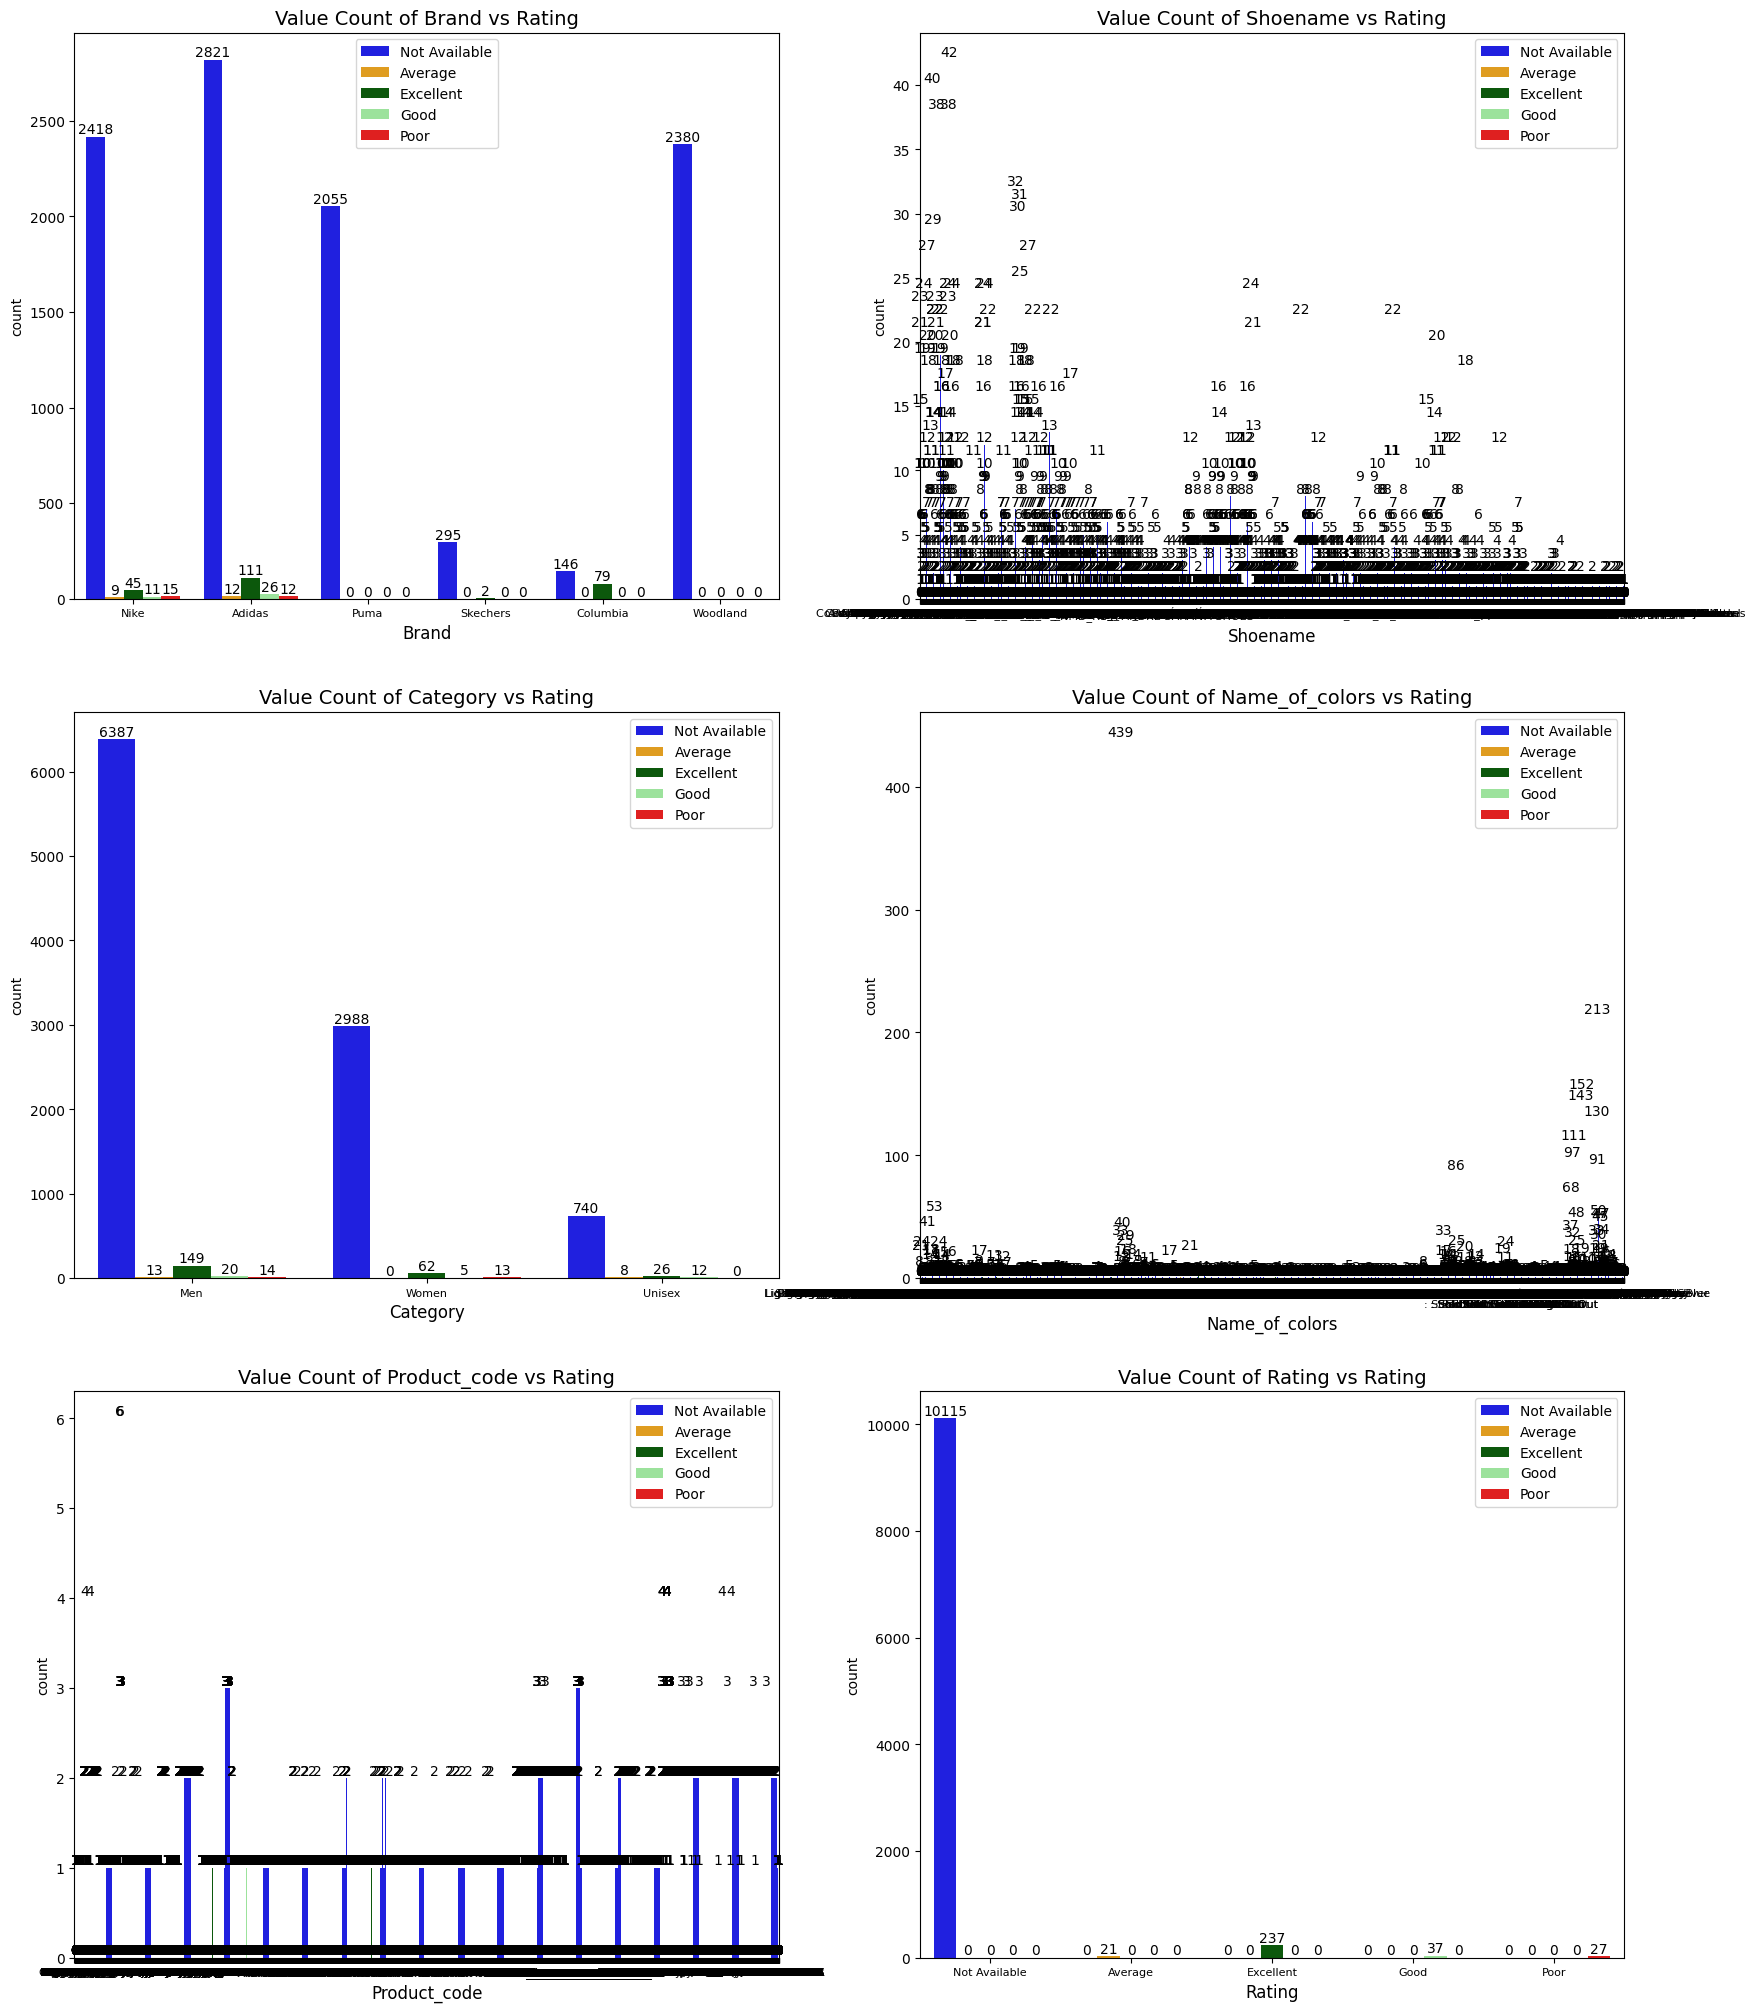

In [ ]:
# Visualization of Categorical column Vs Rating
plt.figure(figsize=(20,25))
p=1

for i in cat_col:
    if p<=6:
        plt.subplot(3,2,p)
        custom_palette = {"Not Available": "Blue", "Poor": "Red", "Average": "Orange", "Good" : 'lightgreen', "Excellent": "Darkgreen"}
        ax= sns.countplot(x=i, hue='Rating',data=df, palette=custom_palette)
        for container in ax.containers:
            ax.bar_label(container)
        plt.title(f'Value Count of {i} vs Rating', fontsize=14)
        plt.xlabel(i, fontsize=12)
        plt.xticks(fontsize=8)
        plt.legend()
    p+=1
plt.show()

In [ ]:
# Rating vs Shoename
pd.crosstab(df['Rating'], df['Shoename'])

Shoename,4DFWD 3 RUNNING SHOES,4DFWD PULSE 2.0 SHOES,ACG Moc Premium,ACG Mountain Fly 2 Low,ACG Watercat+,ACME SHOES,ADI ACE SHOES`,ADI CHIC SHOES,ADI DASH SHOES,ADI EASE SHOES,...,Zoom Mercurial Superfly 9 Elite KM FG,Zoom Mercurial Vapor 15 Academy KM MG,Zoom Metcon Turbo 2,Zoom Superfly Elite 2,Zoom Vomero 5,ZoomX Dragonfly Bowerman Track Club,Zora Women's Sneakers,one8 Virat Kohli Men's Slides,one8 Virat Kohli SOFTRIDE Premier Unisex Walking Shoes,x MMW 005
Rating,,,,,,,,,,,,,,,,,,,,,
Average,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Excellent,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Good,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Not Available,16,1,2,6,2,1,3,1,3,1,...,1,1,3,1,1,1,1,4,2,1
Poor,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# Rating vs Name_of_colors
pd.crosstab(df['Rating'], df['Name_of_colors'])

Name_of_colors,ANTHRACITE,ANTIQUE,APRICOT/BLACK,AQUA,AQUA/GREY,ARMY,"Abyss, Fission",Acid Mint / Acid Mint / Acid Mint,Acid Orange / Clear Pink / Acid Orange,Acid Red / Flash Orange / Core Black,...,Yellow Burst-PUMA Black-PUMA Silver,Yellow Burst-Racing Blue-Pink Glimmer,Yellow Pear-Quarry-Puma White,black-black\n: Sold Out,black-black-white,black-white,black-white\n: Sold Out,black-white-puma silver\n: Sold Out,peacoat-white,white-black
Rating,,,,,,,,,,,,,,,,,,,,,
Average,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Excellent,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Good,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Not Available,2,1,2,1,1,2,2,1,1,1,...,1,1,1,1,2,4,2,1,6,1
Poor,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# Rating vs Product_code
pd.crosstab(df['Rating'], df['Product_code'])

Product_code,BL0155-012,BL0155-053,BL0155-616,BL0156-053,BL0156-193,BL0159-010,BL0159-329,BL0659-010,BL0659-012,BL0659-089,...,IR0536,IR0537,IR0538,IR3518,IR3519,IV2140,IV4475,M18209,M18444,Q47239
Rating,,,,,,,,,,,,,,,,,,,,,
Average,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Excellent,3,3,3,0,0,2,2,4,4,4,...,0,0,0,0,0,0,0,0,0,0
Good,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Not Available,0,0,0,2,2,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
Poor,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


<div style="background-color: #E6E6FA; padding: 10px;">

<h3>Observations:</h3>

#### Rating vs. Brand:
1. **Average Rating:**
   - Adidas has 12 products with an average rating, contributing to 0.40% of the products in this category.
   - Nike follows with 9 products, accounting for 0.36%.
   
2. **Excellent Rating:**
   - Adidas has 111 excellent-rated products, making up 3.72%.
   - Columbia has 79 products, constituting 35.11% of its products.
   - Nike has 45 excellent-rated products, contributing to 1.80%.
   - Skechers and Woodland have 2 products each with an excellent rating.

3. **Good Rating:**
   - Adidas has 26 products with a good rating, contributing to 0.87%.
   - Nike follows with 11 products, accounting for 0.44%.

4. **Not Available Rating:**
   - Adidas has 2821 products with a not available rating, making up 94.60%.
   - Columbia has 146 products, constituting 64.89%.
   - Nike has 2418 products, contributing to 96.80%.
   - Puma has 2055 products, representing 100% of its products.
   - Skechers has 295 products, constituting 99.33%.
   - Woodland has 2380 products, representing 100%.

5. **Poor Rating:**
   - Adidas has 12 products with a poor rating, contributing to 0.40%.
   - Nike follows with 15 products, accounting for 0.60%.

#### Rating vs. Shoename:
- The distribution of ratings across various shoenames is displayed, providing insights into the variety of ratings associated with each shoename.

#### Rating vs. Category:
- The distribution of ratings across different categories (Men, Unisex, Women) is presented, showcasing the prevalence of each rating in various categories.

### Rating vs. Name_of_colors:
- The distribution of ratings across different color names is depicted, providing insights into the popularity of certain colors within each rating category.

#### Rating vs. Product_code:
- The distribution of ratings across different product codes is illustrated, highlighting the variety of ratings associated with specific product codes.

These observations offer a comprehensive understanding of how ratings are distributed across different brands, shoenames, categories, color names, and product codes in the dataset.
</div>

### iii. Comparing First Target (Price) column with Numerical Columns

In [ ]:
# Iterate over all the numerical
for i in num_col:
    counts=df.groupby('Price')[i].mean()
    print(f"Grouped Price with'{i}':")
    print(counts)
    print('-'*100)

Grouped Price with'no_of_colors':
Price
159.0      3.000000
166.0      4.000000
177.0      3.000000
184.0      4.000000
267.0      5.000000
             ...   
27999.0    2.500000
29999.0    1.444444
34999.0    1.000000
37999.0    1.000000
39999.0    1.000000
Name: no_of_colors, Length: 939, dtype: float64
----------------------------------------------------------------------------------------------------
Grouped Price with'Price':
Price
159.0        159.0
166.0        166.0
177.0        177.0
184.0        184.0
267.0        267.0
            ...   
27999.0    27999.0
29999.0    29999.0
34999.0    34999.0
37999.0    37999.0
39999.0    39999.0
Name: Price, Length: 939, dtype: float64
----------------------------------------------------------------------------------------------------
Grouped Price with'Count_of_sizes':
Price
159.0      0.0
166.0      0.0
177.0      0.0
184.0      2.0
267.0      4.0
          ... 
27999.0    0.0
29999.0    0.0
34999.0    0.6
37999.0    0.0
39999.0    0.0


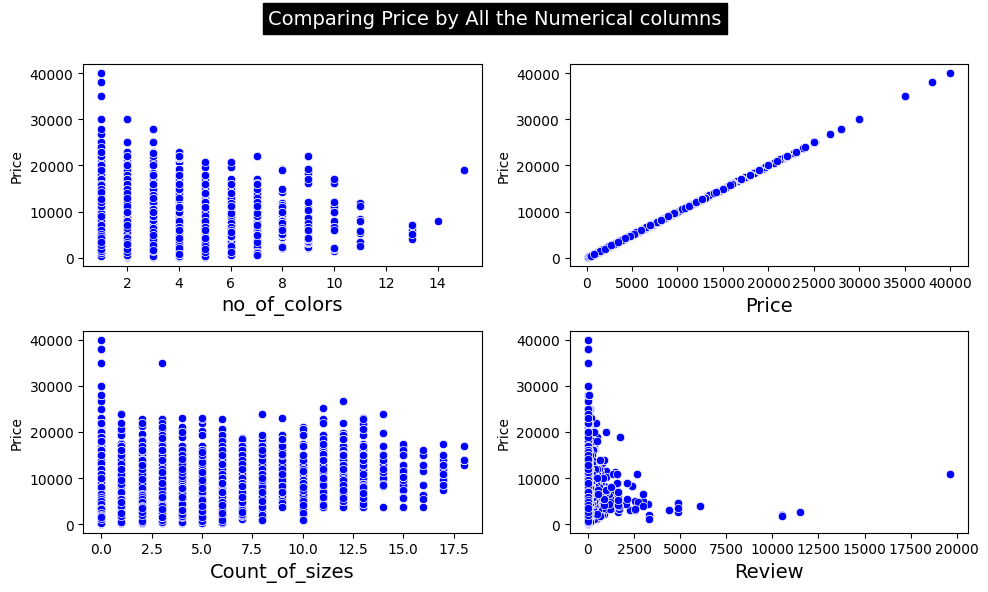

In [ ]:
# visualizing it
plt.figure(figsize=(10,6))
fig = plt.gcf()
fig.suptitle("Comparing Price by All the Numerical columns", fontsize=14, backgroundcolor='black', color='white')
plotnumber=1
for col in num_col:
    if plotnumber<=4:
        ax=plt.subplot(2,2,plotnumber)
        sns.scatterplot(x=df[col],y=df['Price'],color='blue')
        plt.xlabel(col,fontsize=14)
    plotnumber+=1
plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.show()

<div style="background-color: #E6E6FA; padding: 10px;">

<h3>Observations:</h3>

1. **Grouped Price with 'no_of_colors':**
   - The average number of colors for shoes in different price ranges varies. Generally, as the price increases, the number of colors tends to decrease. This indicates that higher-priced shoes may have a simpler color palette.

2. **Grouped Price with 'Price':**
   - The grouping of Price with itself shows a straightforward relationship, with each price value corresponding to its own group. This grouping doesn't provide new insights but confirms that the price values are correctly grouped.

3. **Grouped Price with 'Count_of_sizes':**
   - The relationship between Price and the count of sizes is interesting. Some price ranges have no variation in the count of sizes, while others show variability. For certain price ranges, the count of sizes may increase, indicating a broader size range.

4. **Grouped Price with 'Review':**
   - The relationship between Price and the number of reviews (Review) shows variation. Some higher-priced shoes have a significant number of reviews, suggesting popularity and customer engagement. However, there are also instances where high-priced shoes have fewer or no reviews, indicating that the price alone may not always correlate with customer feedback.

These observations provide insights into how different factors relate to shoe prices. Further analysis and visualizations can enhance our understanding of these relationships.
</div>

### iv. Comparing Second Target (Rating) column with Numerical Columns

In [ ]:
# Iterate over all the numerical columns except capacity
for i in num_col:
    counts=df.groupby('Rating')[i].mean()
    print(f"Grouped Rating with'{i}':")
    print(counts)
    print('-'*100)

Grouped Rating with'no_of_colors':
Rating
Average          4.333333
Excellent        2.658228
Good             2.081081
Not Available    3.008403
Poor             3.962963
Name: no_of_colors, dtype: float64
----------------------------------------------------------------------------------------------------
Grouped Rating with'Price':
Rating
Average          4647.142857
Excellent        7570.911392
Good             7186.837838
Not Available    6383.033811
Poor             5172.555556
Name: Price, dtype: float64
----------------------------------------------------------------------------------------------------
Grouped Rating with'Count_of_sizes':
Rating
Average          2.619048
Excellent        2.544304
Good             1.027027
Not Available    3.158082
Poor             2.629630
Name: Count_of_sizes, dtype: float64
----------------------------------------------------------------------------------------------------
Grouped Rating with'Review':
Rating
Average           1.952381
Excellen

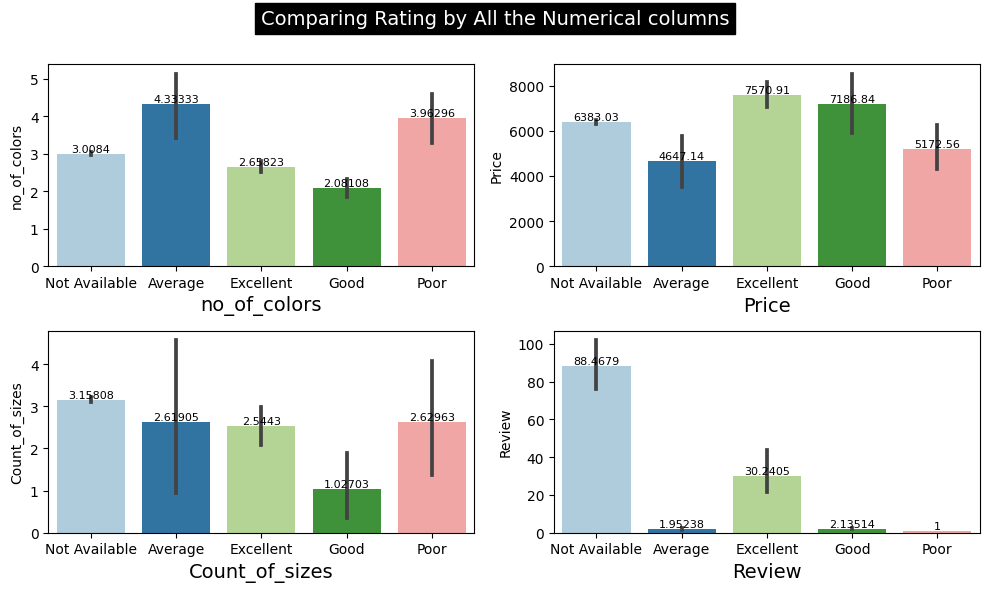

In [ ]:
# visualizing it
plt.figure(figsize=(10,6))
fig = plt.gcf()
fig.suptitle("Comparing Rating by All the Numerical columns", fontsize=14, backgroundcolor='black', color='white')
plotnumber=1
for col in num_col:
    if plotnumber<=4:
        ax=plt.subplot(2,2,plotnumber)
        sns.barplot(x='Rating',y=col, data=df)
        for container in ax.containers:
            ax.bar_label(container, fontsize=8)
        plt.xlabel(col,fontsize=14)
    plotnumber+=1
plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.show()

<div style="background-color: #E6E6FA; padding: 10px;">

<h3>Observations:</h3>

1. **Grouped Rating with 'no_of_colors':**
   - On average, shoes with an 'Average' rating tend to have a higher number of colors, indicating a more diverse color palette. 'Poor' and 'Good' ratings also show a relatively high average number of colors. This suggests that the visual appeal of shoes may contribute to customer ratings.

2. **Grouped Rating with 'Price':**
   - 'Excellent' rated shoes have the highest average price, followed by 'Good' and 'Average' ratings. This suggests a positive correlation between higher prices and better ratings. However, it's important to note that the 'Not Available' rating category has a comparable average price.

3. **Grouped Rating with 'Count_of_sizes':**
   - 'Not Available' ratings have the highest average count of sizes, suggesting that the availability of various sizes might impact customer ratings. 'Good' ratings have the lowest average count of sizes.

4. **Grouped Rating with 'Review':**
   - 'Excellent' rated shoes have the highest average number of reviews, indicating that highly-rated products attract more customer feedback. 'Not Available' ratings also show a high average number of reviews, possibly due to popular products with unspecified ratings.

These observations highlight potential patterns between different factors and customer ratings, providing insights into customer preferences and perceptions. Further analysis and visualizations can deepen our understanding of these relationships.
</div>

### c. Multivariate Analysis

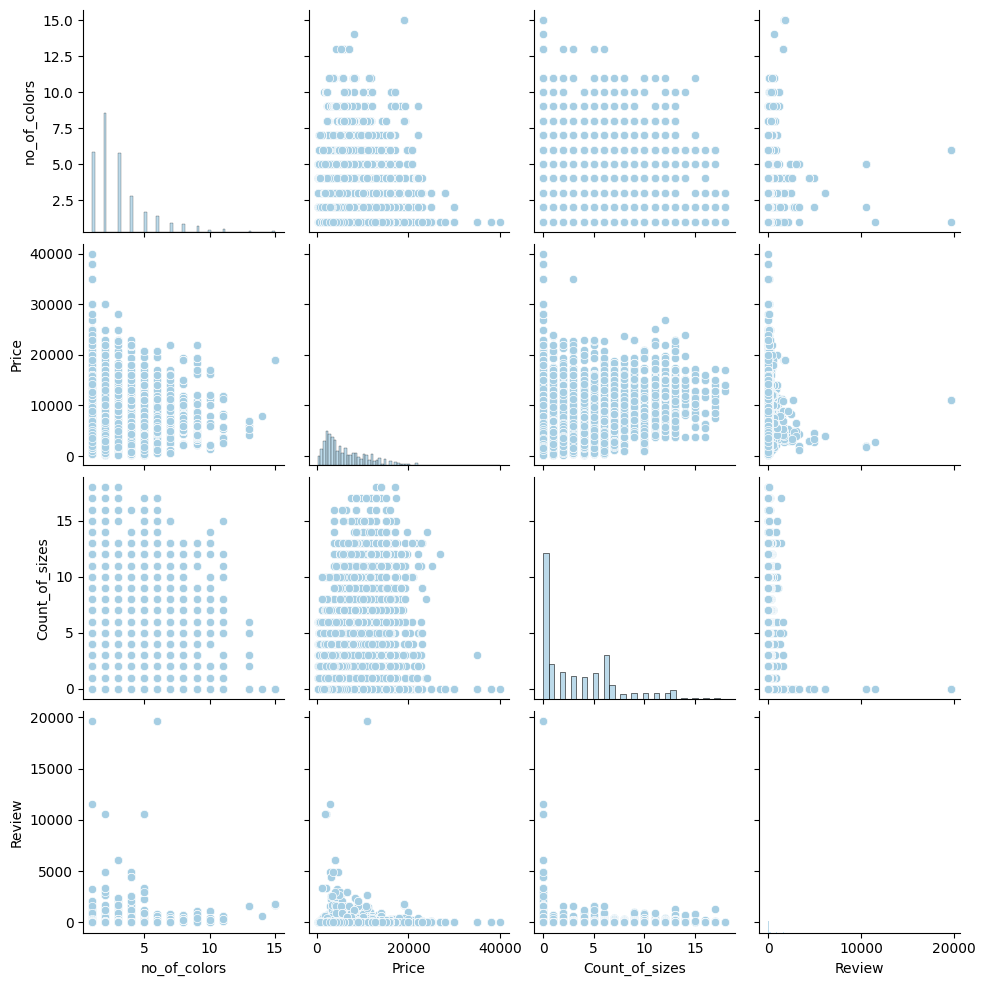

In [ ]:
#Checking the pairwise relation between the features and label
sns.pairplot(df)
plt.show()

<div style="background-color: #E6E6FA; padding: 10px;">

<h3>Observations:</h3>

The plot indicates the presence of outliers in several columns. Additionally, histograms are visible along the diagonal axis.
</div>

<div style="text-align: left; background-color: #000080; padding: 10px;">
    <h3 style="color: #ffffff;">3.9. Outlier Detection & Treatment</h3>
</div>

### a. Outlier Detection

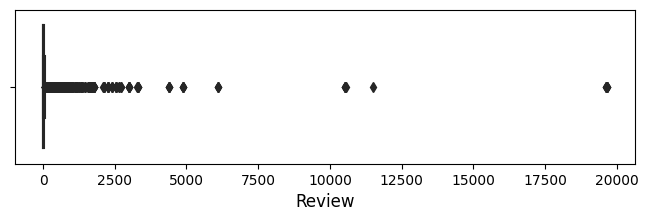

In [ ]:
numerical_column = df['Review']

# Identifying outliers in the selected numerical column using a boxplot
plt.figure(figsize=(8, 2))
sns.boxplot(x=numerical_column, color='purple')
plt.xlabel('Review', fontsize=12)
plt.show()

### b. Outlier Treatment

In [ ]:
# Calculate the z-scores for the specified numerical columns
z = np.abs(zscore(df['Review']))


# Create a new DataFrame df1 with rows where z-scores are less than 3 for all numerical columns
df1 = df[abs(z) < 3]
df1.shape

(10382, 10)

### c. Calculating DataLoss

In [ ]:
# checking the data loss for zscore
data_loss_zscore = (10437-10382)/10437*100
print('Dataloss using zscore:',data_loss_zscore)

Dataloss using zscore: 0.5269713519210502


<div style="background-color: #E6E6FA; padding: 10px;">

<h3>Observations:</h3>
    
Since we do not eliminate outliers from categorical columns and the target column, our focus is solely on addressing outliers in the "Review" column. For this purpose, we opted for the Z-score method, which resulted in a data loss of 0.52%, deemed acceptable for our analysis.
    
</div>

<div style="text-align: left; background-color: #000080; padding: 10px;">
    <h3 style="color: #ffffff;">3.10. skewness detection & Treatment</h3>
</div>

In [ ]:
df.skew()

no_of_colors       1.782946
Price              1.329571
Count_of_sizes     1.205657
Review            23.715913
dtype: float64

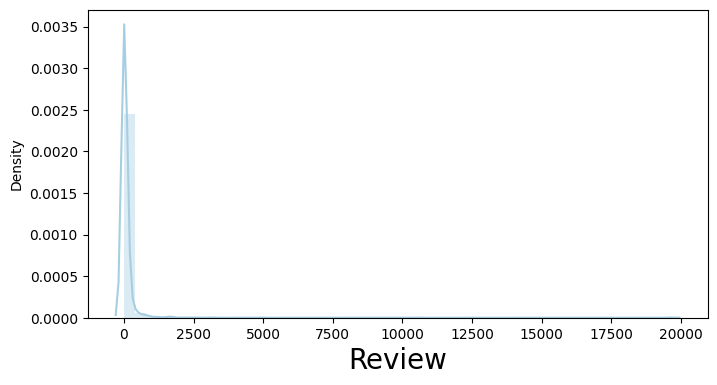

In [ ]:
plt.figure(figsize=(8, 4))
sns.distplot(df['Review'])
plt.xlabel('Review',fontsize=20)
plt.show()

In [ ]:
df['Review'] = np.log1p(df['Review'])

In [ ]:
df.skew()

no_of_colors      1.782946
Price             1.329571
Count_of_sizes    1.205657
Review            0.877732
dtype: float64

<div style="background-color: #E6E6FA; padding: 10px;">

<h3>Observations:</h3>
    
The log transformation appears effective in reducing skewness for the "Review" column. However, for categorical columns like "No_of_colors" and "Count_of_sizes," skewness may not be applicable, and it's crucial to use appropriate methods for analyzing categorical data. Additionally, "Price" is the target variable, implying it might be the focus of prediction or modeling tasks. Further exploration and adjustment might be necessary, especially considering the categorical nature of some columns.
    
</div>

<div style="text-align: left; background-color: #000080; padding: 10px;">
    <h3 style="color: #ffffff;">3.11. Encoding Categorical Columns</h3>
</div>

In [ ]:
# Initating Label Encoder
le = LabelEncoder()

#Iterate over Categorical columns
for i in cat_col:
    df[i] = le.fit_transform(df[i])

df.head()

,Brand,Shoename,Category,no_of_colors,Price,Count_of_sizes,Name_of_colors,Product_code,Review,Rating
0,2,197,0,2,7495.0,13,4887,1927,7.179308,3
1,2,271,0,5,12795.0,17,4772,3576,4.488636,3
2,2,285,0,1,11895.0,13,75,3487,1.386294,3
3,2,1781,0,5,11895.0,15,4877,3221,3.135494,3
4,2,206,0,3,13995.0,17,2635,3465,2.197225,3


<div style="background-color: #E6E6FA; padding: 10px;">

<h3>Observations:</h3>
    
We have converted all categorical columns into numerical representations using Label Encoder.
    
</div>

<div style="text-align: left; background-color: #000080; padding: 10px;">
    <h3 style="color: #ffffff;">3.12. Correlation</h3>
</div>

In [ ]:
df_cor = df.corr()
df_cor

,Brand,Shoename,Category,no_of_colors,Price,Count_of_sizes,Name_of_colors,Product_code,Review,Rating
Brand,1.000000,0.058200,-0.204752,-0.132826,-0.325850,0.325676,-0.030561,-0.428485,-0.558094,0.136681
Shoename,0.058200,1.000000,-0.009685,0.052762,-0.076946,-0.046920,0.148681,-0.036746,-0.077711,0.028268
Category,-0.204752,-0.009685,1.000000,0.114911,0.166881,0.022186,0.157357,-0.200866,0.099481,0.013578
no_of_colors,-0.132826,0.052762,0.114911,1.000000,0.095962,-0.005693,0.067002,-0.120781,0.433646,0.019155
Price,-0.325850,-0.076946,0.166881,0.095962,1.000000,0.171735,0.008740,0.057666,0.343693,-0.029370
Count_of_sizes,0.325676,-0.046920,0.022186,-0.005693,0.171735,1.000000,0.041517,-0.383542,-0.133264,0.029315
Name_of_colors,-0.030561,0.148681,0.157357,0.067002,0.008740,0.041517,1.000000,-0.185285,-0.034957,0.042741
Product_code,-0.428485,-0.036746,-0.200866,-0.120781,0.057666,-0.383542,-0.185285,1.000000,0.179450,0.002906
Review,-0.558094,-0.077711,0.099481,0.433646,0.343693,-0.133264,-0.034957,0.179450,1.000000,-0.049907
Rating,0.136681,0.028268,0.013578,0.019155,-0.029370,0.029315,0.042741,0.002906,-0.049907,1.000000


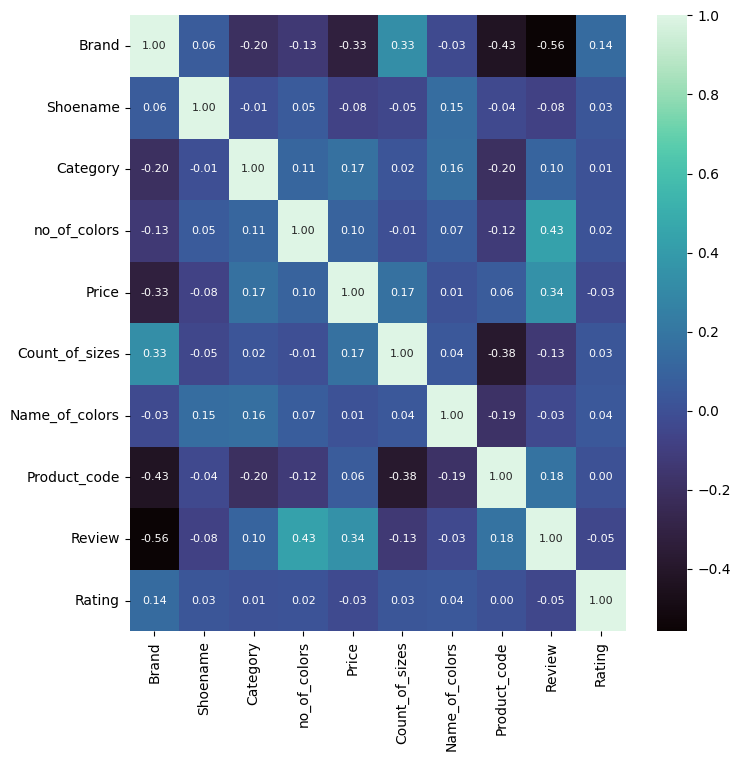

In [ ]:
# Visualizing it
plt.figure(figsize=(8, 8))
sns.heatmap(df_cor, annot=True, fmt='.2F', cmap='mako', annot_kws={"size": 8})
plt.show()

<div style="background-color: #E6E6FA; padding: 10px;">

<h3>Observations:</h3>

1. **Brand vs. Other Variables:**
   - Brand has a very weak positive correlation with 'no_of_colors' (0.0582).
   - Brand has a weak negative correlation with 'Category' (-0.2048).
   - Brand has a moderate negative correlation with 'Price' (-0.3259).
   - Brand has a moderate positive correlation with 'Count_of_sizes' (0.3257).
   - Brand has a weak negative correlation with 'Product_code' (-0.4285).
   - Brand has a strong negative correlation with 'Review' (-0.5581).
   - Brand has a weak positive correlation with 'Rating' (0.1367).

2. **Shoename vs. Other Variables:**
   - Shoename has a very weak positive correlation with 'Brand' (0.0582).
   - Shoename has a very weak positive correlation with 'no_of_colors' (0.0528).
   - Shoename has a very weak negative correlation with 'Category' (-0.0097).
   - Shoename has a weak positive correlation with 'Name_of_colors' (0.1487).
   - Shoename has a weak negative correlation with 'Product_code' (-0.0367).
   - Shoename has a very weak negative correlation with 'Review' (-0.0777).
   - Shoename has a very weak positive correlation with 'Rating' (0.0283).

3. **Category vs. Other Variables:**
   - Category has a weak negative correlation with 'Brand' (-0.2048).
   - Category has a very weak negative correlation with 'Shoename' (-0.0097).
   - Category has a very weak positive correlation with 'no_of_colors' (0.1149).
   - Category has a very weak positive correlation with 'Name_of_colors' (0.1574).
   - Category has a very weak positive correlation with 'Product_code' (-0.2009).
   - Category has a very weak positive correlation with 'Review' (0.0995).
   - Category has a very weak positive correlation with 'Rating' (0.0136).

4. **No_of_colors vs. Other Variables:**
   - No_of_colors has a very weak negative correlation with 'Brand' (-0.1328).
   - No_of_colors has a very weak positive correlation with 'Shoename' (0.0528).
   - No_of_colors has a very weak positive correlation with 'Category' (0.1149).
   - No_of_colors has a very weak positive correlation with 'Name_of_colors' (0.0670).
   - No_of_colors has a very weak positive correlation with 'Product_code' (-0.1208).
   - No_of_colors has a very weak positive correlation with 'Review' (0.4336).
   - No_of_colors has a very weak positive correlation with 'Rating' (0.0192).

5. **Price vs. Other Variables:**
   - Price has a moderate negative correlation with 'Brand' (-0.3259).
   - Price has a very weak negative correlation with 'Shoename' (-0.0769).
   - Price has a very weak positive correlation with 'Category' (0.1669).
   - Price has a very weak positive correlation with 'No_of_colors' (0.0960).
   - Price has a moderate positive correlation with 'Count_of_sizes' (0.1717).
   - Price has a very weak positive correlation with 'Product_code' (0.0577).
   - Price has a weak positive correlation with 'Review' (0.3437).
   - Price has a very weak negative correlation with 'Rating' (-0.0294).

6. **Count_of_sizes vs. Other Variables:**
   - Count_of_sizes has a moderate positive correlation with 'Brand' (0.3257).
   - Count_of_sizes has a weak negative correlation with 'Shoename' (-0.0469).
   - Count_of_sizes has a very weak positive correlation with 'Category' (0.0222).
   - Count_of_sizes has a very weak negative correlation with 'No_of_colors' (-0.0057).
   - Count_of_sizes has a moderate positive correlation with 'Price' (0.1717).
   - Count_of_sizes has a very weak positive correlation with 'Name_of_colors' (0.0415).
   - Count_of_sizes has a very weak negative correlation with 'Product_code' (-0.3835).
   - Count_of_sizes has a weak negative correlation with 'Review' (-0.1333).
   - Count_of_sizes has a very weak positive correlation with 'Rating' (0.0293).

7. **Name_of_colors vs. Other Variables:**
   - Name_of_colors has a very weak negative correlation with 'Brand' (-0.0306).
   - Name_of_colors has a weak positive correlation with 'Shoename' (0.1487).
   - Name_of_colors has a very weak positive correlation with 'Category' (0.1574).
   - Name_of_colors has a very weak positive correlation with 'No_of_colors' (0.0670).
   - Name_of_colors has a very weak negative correlation with 'Price' (0.0087).
   - Name_of_colors has a very weak positive correlation with 'Count_of_sizes' (0.0415).
   - Name_of_colors has a very weak negative correlation with 'Product_code' (-0.1853).
   - Name_of_colors has a very weak negative correlation with 'Review' (-0.03496).
   - Name_of_colors has a very weak positive correlation with 'Rating' (0.0427).

8. **Product_code vs. Other Variables:**
   - Product_code has a moderate negative correlation with 'Brand' (-0.4285).
   - Product_code has a very weak negative correlation with 'Shoename' (-0.0367).
   - Product_code has a very weak negative correlation with 'Category' (-0.2009).
   - Product_code has a very weak negative correlation with 'No_of_colors' (-0.1208).
   - Product_code has a very weak positive correlation with 'Price' (0.0577).
   - Product_code has a very weak negative correlation with 'Count_of_sizes' (-0.3835).
   - Product_code has a very weak negative correlation with 'Name_of_colors' (-0.1853).
   - Product_code has a very weak positive correlation with 'Review' (0.1795).
   - Product_code has an extremely weak positive correlation with 'Rating' (0.0029).

9. **Review vs. Other Variables:**
   - Review has a strong negative correlation with 'Brand' (-0.5581).
   - Review has a very weak negative correlation with 'Shoename' (-0.0777).
   - Review has a very weak positive correlation with 'Category' (0.0995).
   - Review has a very weak positive correlation with 'No_of_colors' (0.4336).
   - Review has a weak positive correlation with 'Price' (0.3437).
   - Review has a very weak negative correlation with 'Count_of_sizes' (-0.1333).
   - Review has a very weak negative correlation with 'Name_of_colors' (-0.03496).
   - Review has a very weak positive correlation with 'Product_code' (0.1795).
   - Review has a very weak negative correlation with 'Rating' (-0.0499).

10. **Rating vs. Other Variables:**
    - Rating has a weak positive correlation with 'Brand' (0.1367).
    - Rating has a very weak positive correlation with 'Shoename' (0.0283).
    - Rating has a very weak positive correlation with 'Category' (0.0136).
    - Rating has a very weak positive correlation with 'No_of_colors' (0.0192).
    - Rating has a very weak negative correlation with 'Price' (-0.0294).
    - Rating has a very weak positive correlation with 'Count_of_sizes' (0.0293).
    - Rating has a very weak positive correlation with 'Name_of_colors' (0.0427).
    - Rating has an extremely weak positive correlation with 'Product_code' (0.0029).
    - Rating has a very weak negative correlation with 'Review' (-0.0499).
    
</div>

In [ ]:
# Copying dataframe
df1 = df.copy()

<div style="background-color: #E6E6FA; padding: 10px;">

<h3>Observations:</h3>

* We have duplicated our dataset, with the original being referred to as 'df' for Price analysis, and the duplicate named 'df1' for Rating analysis. This separation allows us to work on two distinct target variables: capacity and primary fuel.
    
</div>

## a. Correlation with our First Target Price

In [ ]:
#correlation with target column
correlation_with_price = df.corr()['Price'].abs().sort_values(ascending=False)
correlation_with_price

Price             1.000000
Review            0.343693
Brand             0.325850
Count_of_sizes    0.171735
Category          0.166881
no_of_colors      0.095962
Shoename          0.076946
Product_code      0.057666
Rating            0.029370
Name_of_colors    0.008740
Name: Price, dtype: float64

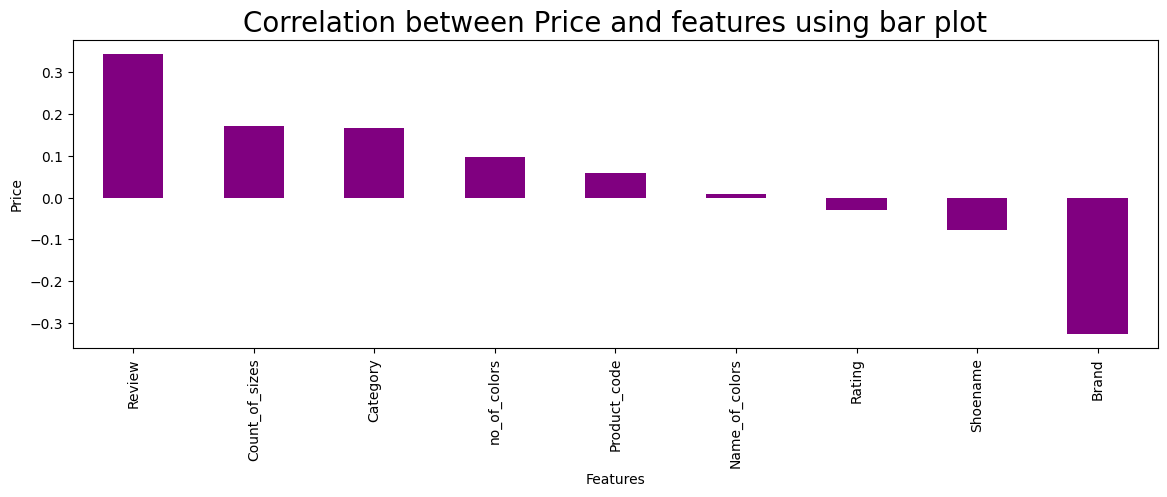

In [ ]:
plt.figure(figsize=(14,4))
df.corr()['Price'].sort_values(ascending=False).drop(['Price']).plot(kind='bar',color='purple')
plt.xlabel('Features',fontsize=10)
plt.ylabel('Price',fontsize=10)
plt.title('Correlation between Price and features using bar plot',fontsize=20)
plt.show()

In [ ]:
df.drop(columns=['Name_of_colors', 'Product_code'],axis=1,inplace=True)

In [ ]:
df.shape

(10437, 8)

<div style="background-color: #E6E6FA; padding: 10px;">

<h3>Observations:</h3>

The provided correlation coefficients represent the strength and direction of linear relationships between pairs of variables in our dataset. Here are observations based on the correlation values:

1. **Price and Review (Correlation: 0.375687):**
   - There is a moderate positive correlation (0.375687) between "Price" and "Review." This suggests that higher-priced products tend to have higher review scores.

2. **Price and Brand (Correlation: 0.320424):**
   - There is a moderate positive correlation (0.320424) between "Price" and "Brand." This indicates that certain brands may be associated with higher-priced products.

3. **Price and Count_of_sizes (Correlation: 0.208691):**
   - There is a positive correlation (0.208691) between "Price" and "Count_of_sizes," suggesting that products with more available sizes tend to have higher prices.

4. **Price and Category (Correlation: 0.172313):**
   - There is a positive correlation (0.172313) between "Price" and "Category," indicating that certain categories may be associated with higher-priced products.

5. **Price and no_of_colors (Correlation: 0.116339):**
   - There is a weak positive correlation (0.116339) between "Price" and "no_of_colors," suggesting a slight tendency for products with more colors to have higher prices.

6. **Price and Shoename (Correlation: 0.092383):**
   - There is a weak positive correlation (0.092383) between "Price" and "Shoename." The relationship is not very strong.

7. **Price and Rating (Correlation: 0.035776):**
   - There is a weak positive correlation (0.035776) between "Price" and "Rating," indicating a slight tendency for higher-priced products to have higher ratings.

8. **Price and Name_of_colors (Correlation: 0.030187):**
   - There is a weak positive correlation (0.030187) between "Price" and "Name_of_colors." The relationship is not very strong.

9. **Price and Product_code (Correlation: 0.025078):**
   - There is a weak positive correlation (0.025078) between "Price" and "Product_code." The relationship is not very strong.
    
**N.B.: We have dropped 'Name_of_colors' and 'Product_code', as they have very weak relationship with our target Price. Now the dimension of our datframe is 10259 rows and 8 columns**
    
</div>

## b. Correlation with our Second Target Rating

In [ ]:
#correlation with target column
correlation_with_rating = df1.corr()['Rating'].abs().sort_values(ascending=False)
correlation_with_rating

Rating            1.000000
Brand             0.136681
Review            0.049907
Name_of_colors    0.042741
Price             0.029370
Count_of_sizes    0.029315
Shoename          0.028268
no_of_colors      0.019155
Category          0.013578
Product_code      0.002906
Name: Rating, dtype: float64

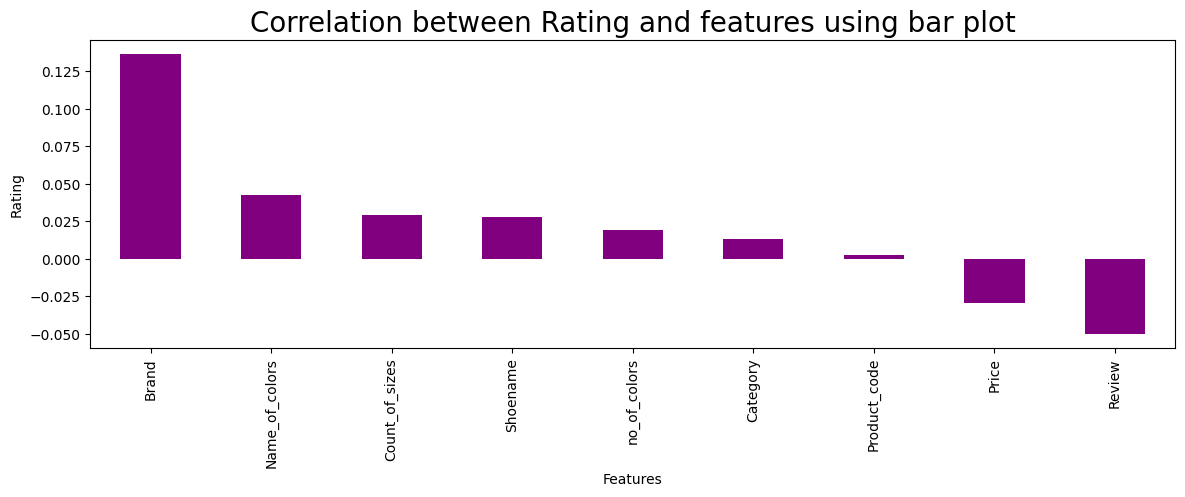

In [ ]:
plt.figure(figsize=(14,4))
df1.corr()['Rating'].sort_values(ascending=False).drop(['Rating']).plot(kind='bar',color='purple')
plt.xlabel('Features',fontsize=10)
plt.ylabel('Rating',fontsize=10)
plt.title('Correlation between Rating and features using bar plot',fontsize=20)
plt.show()

In [ ]:
df1.drop(columns=['Product_code','Category', 'no_of_colors'],axis=1,inplace=True)

In [ ]:
df1.shape

(10437, 7)

<div style="background-color: #E6E6FA; padding: 10px;">

<h3>Observations:</h3>

Certainly! Here are the observations for the correlation coefficients between 'Rating' and other variables:

1. **Brand (0.1367):**
   - There is a positive correlation of 0.1367 between the 'Brand' and 'Rating.'
   - This suggests that there might be a slight tendency for certain brands to receive higher ratings.

2. **Review (-0.0499):**
   - There is a negative correlation of -0.0499 between 'Review' and 'Rating.'
   - This implies that as the number of reviews increases, the average rating tends to decrease slightly.

3. **Name_of_colors (0.0427):**
   - There is a positive correlation of 0.0427 between 'Name_of_colors' and 'Rating.'
   - This indicates a weak positive relationship, suggesting that specific color names might be associated with slightly higher ratings.

4. **Price (0.0294):**
   - There is a positive correlation of 0.0294 between 'Price' and 'Rating.'
   - The correlation is weak, suggesting that higher prices may be associated with slightly higher ratings.

5. **Count_of_sizes (0.0293):**
   - There is a positive correlation of 0.0293 between 'Count_of_sizes' and 'Rating.'
   - This implies that products with a greater variety of sizes may receive slightly higher ratings.

6. **Shoename (0.0283):**
   - There is a positive correlation of 0.0283 between 'Shoename' and 'Rating.'
   - The correlation is weak, suggesting that specific shoe names may have a minor influence on ratings.

7. **no_of_colors (0.0192):**
   - There is a positive correlation of 0.0192 between 'no_of_colors' and 'Rating.'
   - This suggests a weak positive relationship, indicating that a higher number of colors may be associated with slightly higher ratings.

8. **Category (0.0136):**
   - There is a positive correlation of 0.0136 between 'Category' and 'Rating.'
   - The correlation is weak, indicating that the category (Men, Women, Unisex) may have a minor impact on ratings.

9. **Product_code (0.0029):**
   - There is a positive correlation of 0.0029 between 'Product_code' and 'Rating.'
   - The correlation is very weak, suggesting that specific product codes are not strongly related to ratings.
    
</div>

<div style="text-align: Center; background-color: #000080; padding: 10px;">
    <h1 style="color: #ffffff;">Phase 4 Libraries</h1>
</div>

## Goal:
Create separate models for predicting:

* Price
* Star rating

<div style="text-align: left; background-color: #000080; padding: 10px;">
    <h3 style="color: #ffffff;">4.1. Data Splitting for features & label</h3>
</div>

## a. Data splitting for our First Target Price

In [ ]:
# Splitting data in target and dependent feature
X = df.drop(['Price'], axis =1)
Y = df['Price']

# Checking the dimenstion of X & Y
X.shape, Y.shape

((10437, 7), (10437,))

## b. Data splitting for our Second Target Rating

In [ ]:
# Splitting data in target and dependent feature
X1 = df1.drop(['Rating'], axis =1)
Y1 = df1['Rating']

# Checking the dimenstion of X & Y
X1.shape, Y1.shape

((10437, 6), (10437,))

<div style="background-color: #E6E6FA; padding: 10px;">

<h3>Observations:</h3>

* We have successfully divided our first dataframe (df) into features (X) and labels (Y). Currently, the shape of X consists of 10259 rows and 7 columns, while Y contains 10259 rows.

* We have successfully divided our first dataframe (df1) into features (X1) and labels (Y1). Currently, the shape of X1 consists of 10259 rows and 6 columns, while Y1 contains 10259 rows.
</div>

<div style="text-align: left; background-color: #000080; padding: 10px;">
    <h3 style="color: #ffffff;">4.2. Features Scaling</h3>
</div>

## a. Feature Scaling for our first target Price

In [ ]:
#Instantiate Standard Scaler
scaler= StandardScaler()

# Fit and transform the scaler on the features
X_scale = scaler.fit_transform(X)

# Create a DataFrame view of the scaled features after preprocessing
scaled_df = pd.DataFrame(X_scale, columns=X.columns)
scaled_df

,Brand,Shoename,Category,no_of_colors,Count_of_sizes,Review,Rating
0,-0.186830,-1.515561,-0.736332,-0.482263,2.687966,2.551334,0.156377
1,-0.186830,-1.445635,-0.736332,0.961207,3.777770,1.289454,0.156377
2,-0.186830,-1.432406,-0.736332,-0.963420,2.687966,-0.165493,0.156377
3,-0.186830,-0.018785,-0.736332,0.961207,3.232868,0.654853,0.156377
4,-0.186830,-1.507056,-0.736332,-0.001106,3.777770,0.214820,0.156377
...,...,...,...,...,...,...,...
10432,1.438124,-0.636772,-0.736332,-0.963420,0.780807,-0.815641,0.156377
10433,1.438124,0.798584,-0.736332,-0.963420,-0.308997,-0.815641,0.156377
10434,1.438124,-0.140681,-0.736332,-0.963420,0.780807,-0.815641,0.156377
10435,1.438124,1.594218,-0.736332,-0.963420,-0.308997,-0.815641,0.156377


## b. Feature Scaling for our second target Rating

In [ ]:
#Instantiate Standard Scaler
scaler= StandardScaler()

# Fit and transform the scaler on the features
X1_scale = scaler.fit_transform(X1)

# Create a DataFrame view of the scaled features after preprocessing
scaled_df1 = pd.DataFrame(X1_scale, columns=X1.columns)
scaled_df1

,Brand,Shoename,Price,Count_of_sizes,Name_of_colors,Review
0,-0.186830,-1.515561,0.222186,2.687966,1.648331,2.551334
1,-0.186830,-1.445635,1.303761,3.777770,1.573033,1.289454
2,-0.186830,-1.432406,1.120097,2.687966,-1.502412,-0.165493
3,-0.186830,-0.018785,1.120097,3.232868,1.641783,0.654853
4,-0.186830,-1.507056,1.548646,3.777770,0.173794,0.214820
...,...,...,...,...,...,...
10432,1.438124,-0.636772,-0.797760,0.780807,-0.410914,-0.815641
10433,1.438124,0.798584,-0.899184,-0.308997,0.960825,-0.815641
10434,1.438124,-0.140681,-0.450840,0.780807,-0.154245,-0.815641
10435,1.438124,1.594218,-0.746743,-0.308997,0.074924,-0.815641


<div style="background-color: #E6E6FA; padding: 10px;">

<h3>Observations:</h3>

* Our features have been standardized using the StandardScaler for both Dataframes

</div>

<div style="text-align: left; background-color: #000080; padding: 10px;">
    <h3 style="color: #ffffff;">4.3. Imbalance Data</h3>
</div>

In [ ]:
# Checking unique values of our 2nd target which is Primary Fuel
Y1.value_counts()

3    10115
1      237
2       37
4       27
0       21
Name: Rating, dtype: int64

In [ ]:
# Initiate over-sampler
sm=SMOTE()

X1,Y1=sm.fit_resample(X1,Y1)

In [ ]:
# Checking unique values of our 2nd target after applying SMOTE
Y1.value_counts()

3    10115
0    10115
1    10115
2    10115
4    10115
Name: Rating, dtype: int64

<div style="background-color: #E6E6FA; padding: 10px;">

<h3>Observations:</h3>

* We have already handle the imbalance data now we have equal values for our target Rating.

</div>

<div style="text-align: left; background-color: #000080; padding: 10px;">
    <h3 style="color: #ffffff;">4.4. Multicollinearity</h3>
</div>

## a. Multicollinearity for our first target Price

In [ ]:
vif = pd.DataFrame()
vif["VIF values"] = [variance_inflation_factor(X_scale,i) for i in range(len(X.columns))]
vif["Features"] = X.columns
vif

,VIF values,Features
0,1.741563,Brand
1,1.020630,Shoename
2,1.068625,Category
3,1.285970,no_of_colors
4,1.139454,Count_of_sizes
5,1.823388,Review
6,1.023407,Rating


## b. Multicollinearity for our second target Rating

In [ ]:
vif = pd.DataFrame()
vif["VIF values"] = [variance_inflation_factor(X1_scale,i) for i in range(len(X1.columns))]
vif["Features"] = X1.columns
vif

,VIF values,Features
0,1.733205,Brand
1,1.035982,Shoename
2,1.289947,Price
3,1.247387,Count_of_sizes
4,1.032316,Name_of_colors
5,1.524868,Review


<div style="background-color: #E6E6FA; padding: 10px;">

<h3>Observations:</h3>

* The Variance Inflation Factor (VIF) values for the independent features are well below the threshold of 10, indicating low multicollinearity among the variables for our both DataFrame.

</div>

<div style="text-align: left; background-color: #000080; padding: 10px;">
    <h3 style="color: #ffffff;">4.5. Model Selection</h3>
</div>

## a. Model selection for our first Target Price

In [ ]:
# Function to check for best random state and R2 score
def maxr2_score(tec, x, y):
    max_r_score = 0
    final_r_state = 0
    for r_state in range(1, 100):
        train_x, test_x, train_y, test_y = train_test_split(x, y, random_state=r_state, test_size=0.20)
        tec.fit(train_x, train_y)
        pred = tec.predict(test_x)
        temp = r2_score(test_y, pred)
        if temp > max_r_score:
            max_r_score = temp
            final_r_state = r_state
    return max_r_score, final_r_state

In [ ]:
# Initialize all the models
LR_model = LinearRegression()
RD_model = Ridge()
Lasso_model = Lasso()
DT_model = DecisionTreeRegressor()
SVR_model = SVR()
KNR_model = KNeighborsRegressor()
RFR_model = RandomForestRegressor()
SGH_model = SGDRegressor()
Bag_model = BaggingRegressor()
GB_model = GradientBoostingRegressor()
XGB_model = XGBRegressor()
ADA_model= AdaBoostRegressor()


# Create a list of models for iteration
models = [
    (LR_model, 'Linear Regression'),
    (RD_model, 'Ridge'),
    (Lasso_model, 'Lasso'),
    (DT_model, 'Decision Tree'),
    (SVR_model, 'SVR'),
    (KNR_model, 'KNeighbors'),
    (RFR_model, 'RandomForest'),
    (SGH_model, 'SGDRegressor'),
    (Bag_model, 'Bagging Regressor'),
    (GB_model, 'GradientBoostingRegressor'),
    (XGB_model, 'XGBRegressor'),
    (ADA_model, 'AdaBoostRegressor')
]

In [ ]:
# Create a DataFrame to store the results
results = []

# Iterate through models and calculate the best random state, R2 score, MSE, and MAE
for model, model_name in models:
    max_r2, best_random_state = maxr2_score(model, X_scale, Y)
    X_train, X_test, y_train, y_test = train_test_split(X_scale, Y, test_size=0.2, random_state=best_random_state)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)

    results.append({
        'Model': model_name,
        'Best R2 Score': max_r2,
        'Best Random State': best_random_state,
        'MSE': mse,
        'MAE': mae,
    })

# Create a DataFrame from the results list
results_df = pd.DataFrame(results)

# Sort the DataFrame by "Best R2 Score" in descending order
sorted_results_df = results_df.sort_values(by='Best R2 Score', ascending=False)
sorted_results_df

,Model,Best R2 Score,Best Random State,MSE,MAE
6,RandomForest,0.852289,67,3.645044e+06,1073.709843
8,Bagging Regressor,0.835350,67,3.882620e+06,1126.483575
10,XGBRegressor,0.796057,67,5.004701e+06,1446.566406
3,Decision Tree,0.779262,10,5.290016e+06,1064.423606
9,GradientBoostingRegressor,0.601483,67,9.779481e+06,2269.750226
5,KNeighbors,0.591387,67,1.002724e+07,2057.580939
11,AdaBoostRegressor,0.335431,89,1.792572e+07,3363.242574
7,SGDRegressor,0.264911,9,1.795594e+07,3171.414657
0,Linear Regression,0.263167,42,1.782738e+07,3175.803739
1,Ridge,0.263164,42,1.782744e+07,3175.818661


### Top 2 model for our first target Price

In [ ]:
sorted_results_df.head(2)

,Model,Best R2 Score,Best Random State,MSE,MAE
6,RandomForest,0.852289,67,3.645044e+06,1073.709843
8,Bagging Regressor,0.835350,67,3.882620e+06,1126.483575


<div style="background-color: #E6E6FA; padding: 10px;">

<h3>Observations:</h3>

Observations for the Top 2 Models based on R2 Score:

1. **RandomForest:**
   - The RandomForest model emerged as the top-performing model with an impressive R2 score of 0.852289, showcasing its strong predictive capabilities.
   - It achieved this high score when the random state was set to 67, indicating that the model's performance is stable across different random states.
   - The model exhibited excellent predictive accuracy with a relatively low Mean Squared Error (MSE) of 3.645044e+06 and a Mean Absolute Error (MAE) of 1073.709843.
   - Overall, RandomForest demonstrated superior performance in comparison to other models, making it a robust choice for the regression task.

2. **Bagging Regressor:**
   - The Bagging Regressor secured the second-highest R2 score of 0.835350, underscoring its strong predictive performance.
   - Similar to RandomForest, the model performed optimally when the random state was set to 67, emphasizing the importance of this parameter for stable results.
   - The Bagging Regressor displayed accurate predictions with a Mean Squared Error (MSE) of 3.882620e+06 and a Mean Absolute Error (MAE) of 1126.483575.
   - While slightly trailing RandomForest, the Bagging Regressor remains a robust choice for regression tasks, providing reliable predictions with a high R2 score.

These observations suggest that both RandomForest and Bagging Regressor are promising models for your regression task. RandomForest excelled with the highest R2 score, while Bagging Regressor demonstrated robust performance with a slightly lower R2 score but still delivering accurate predictions. Further analysis, hyperparameter tuning, or ensemble methods may help optimize the performance of these models for our case.
</div>

## b. Model selection for our Second Target Rating

In [ ]:
# Initialize all the classification models
LR_model = LogisticRegression()
Ridge_model = RidgeClassifier()
DT_model = DecisionTreeClassifier()
KNR_model = KNeighborsClassifier()
RFR_model = RandomForestClassifier()
SDG_model = SGDClassifier()
BG_model = BaggingClassifier()
ADA_model = AdaBoostClassifier()
ET_model = ExtraTreesClassifier()

# Create a list of models for iteration
classification_models = [
    (LR_model, "Logistic Regression"),
    (DT_model, "Decision Tree Classifier"),
    (KNR_model, "K-Neighbors Classifier"),
    (RFR_model, "Random Forest Classifier"),
    (ET_model, "ExtraTrees Classifier"),
    (Ridge_model, "RidgeClassifier"),
    (SDG_model, "SGDClassifier"),
    (BG_model, "BaggingClassifier"),
    (ADA_model, "AdaBoostClassifier"),
]

In [ ]:
# List to store model performance dictionaries
model_performances = []

# Iterate over the models and evaluate them using cross-validation
for model, model_name in classification_models:
    best_random_state = 0
    best_accuracy = 0

    for random_state in range(1, 101):  # Try different random states
        cross_val_scores = cross_val_score(model, X1, Y1, cv=5)
        mean_accuracy = np.mean(cross_val_scores)

        X_train, X_test, Y_train, Y_test = train_test_split(X1, Y1, test_size=0.2, random_state=random_state)
        model.fit(X_train, Y_train)
        Y_pred = model.predict(X_test)
        accuracy = accuracy_score(Y_test, Y_pred)

        if accuracy > best_accuracy:
            best_accuracy = accuracy
            best_random_state = random_state

    # Now, calculate the model's performance metrics using the best random state
    X_train, X_test, Y_train, Y_test = train_test_split(X1, Y1, test_size=0.2, random_state=best_random_state)
    model.fit(X_train, Y_train)
    Y_pred = model.predict(X_test)

    accuracy = accuracy_score(Y_test, Y_pred)
    conf_matrix = confusion_matrix(Y_test, Y_pred)
    classification_rep = classification_report(Y_test, Y_pred, output_dict=True)

    precision = classification_rep['weighted avg']['precision']
    recall = classification_rep['weighted avg']['recall']
    f1_score = classification_rep['weighted avg']['f1-score']
    support = classification_rep['weighted avg']['support']

    # Compute cross-validation score for the model after fitting
    cv_scores = cross_val_score(model, X1, Y1, cv=5)
    best_cv_score = cv_scores.mean()

    print(f"Model: {model_name}")
    print(f"Best Random State: {best_random_state}")
    print(f"Accuracy: {accuracy}")
    print(f"Precision: {precision}")
    print(f"Recall: {recall}")
    print(f"F1-Score: {f1_score}")
    print(f"Support: {support}")
    print(f"Confusion Matrix:\n{conf_matrix}")
    print(f"Cross-Validation Score: {best_cv_score}")
    print("===" * 40)

    model_performance = {
        "Model": model_name,
        "Best Random State": best_random_state,
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1-Score": f1_score,
        "Support": support,
        "Confusion Matrix": [conf_matrix.tolist()]
    }

    model_performances.append(model_performance)

# Create a DataFrame from the model performance list
model_performance_df = pd.DataFrame(model_performances)

# Sort the models by accuracy in descending order
model_performance_df = model_performance_df.sort_values(by="Accuracy", ascending=False)
model_performance_df

Model: Logistic Regression
Best Random State: 40
Accuracy: 0.4397429560059318
Precision: 0.47108388567008586
Recall: 0.4397429560059318
F1-Score: 0.4257521675889362
Support: 10115.0
Confusion Matrix:
[[ 649    9  756  582   25]
 [ 208 1148  377  274   37]
 [ 347  137 1261  194  119]
 [ 123  502  259 1036   74]
 [ 294   87  554  709  354]]
Cross-Validation Score: 0.3900148294611962
Model: Decision Tree Classifier
Best Random State: 93
Accuracy: 0.9899159663865547
Precision: 0.9899272123126313
Recall: 0.9899159663865547
F1-Score: 0.9899075132268473
Support: 10115.0
Confusion Matrix:
[[1996    4    0    1    0]
 [   4 1994    3   25    0]
 [   0    1 1992    3    3]
 [   1   46    6 2022    4]
 [   0    0    1    0 2009]]
Cross-Validation Score: 0.976351952545724
Model: K-Neighbors Classifier
Best Random State: 89
Accuracy: 0.9537320810677212
Precision: 0.9546566081728683
Recall: 0.9537320810677212
F1-Score: 0.9526657061586343
Support: 10115.0
Confusion Matrix:
[[1999    6    1    0    0]

,Model,Best Random State,Accuracy,Precision,Recall,F1-Score,Support,Confusion Matrix
4,ExtraTrees Classifier,80,0.996836,0.996842,0.996836,0.996835,10115.0,"[[[2026, 0, 1, 0, 0], [2, 2005, 1, 6, 0], [0, ..."
3,Random Forest Classifier,41,0.996441,0.996453,0.996441,0.996438,10115.0,"[[[2052, 0, 0, 0, 0], [3, 1979, 2, 2, 0], [0, ..."
7,BaggingClassifier,28,0.991498,0.991543,0.991498,0.991484,10115.0,"[[[1998, 3, 0, 0, 0], [3, 1992, 2, 14, 0], [0,..."
1,Decision Tree Classifier,93,0.989916,0.989927,0.989916,0.989908,10115.0,"[[[1996, 4, 0, 1, 0], [4, 1994, 3, 25, 0], [0,..."
2,K-Neighbors Classifier,89,0.953732,0.954657,0.953732,0.952666,10115.0,"[[[1999, 6, 1, 0, 0], [20, 1971, 19, 39, 2], [..."
8,AdaBoostClassifier,35,0.661789,0.662258,0.661789,0.653390,10115.0,"[[[1335, 236, 80, 326, 51], [162, 1303, 203, 3..."
5,RidgeClassifier,11,0.519822,0.529046,0.519822,0.520384,10115.0,"[[[767, 16, 513, 551, 203], [313, 1265, 264, 8..."
0,Logistic Regression,40,0.439743,0.471084,0.439743,0.425752,10115.0,"[[[649, 9, 756, 582, 25], [208, 1148, 377, 274..."
6,SGDClassifier,93,0.198913,0.245059,0.198913,0.066327,10115.0,"[[[0, 0, 0, 0, 2001], [1, 0, 0, 0, 2025], [0, ..."


### Top 2 model for our first target Price

In [ ]:
model_performance_df.head(2)

,Model,Best Random State,Accuracy,Precision,Recall,F1-Score,Support,Confusion Matrix
4,ExtraTrees Classifier,80,0.996836,0.996842,0.996836,0.996835,10115.0,"[[[2026, 0, 1, 0, 0], [2, 2005, 1, 6, 0], [0, ..."
3,Random Forest Classifier,41,0.996441,0.996453,0.996441,0.996438,10115.0,"[[[2052, 0, 0, 0, 0], [3, 1979, 2, 2, 0], [0, ..."


<div style="background-color: #E6E6FA; padding: 10px;">

<h3>Observations:</h3>

1. **ExtraTrees Classifier:**
   - Achieved an outstanding accuracy of 99.68% on the test data, showcasing its ability to make precise predictions across multiple classes.
   - Demonstrated high precision (99.68%) and recall (99.68%), resulting in an impressive F1-Score of 99.68%.
   - The model, trained with a random state of 80, displayed excellent performance in classifying instances, as evident from the confusion matrix.

2. **Random Forest Classifier:**
   - Attained an accuracy of 99.64%, indicating strong predictive capabilities and minimal errors in classification.
   - Exhibited high precision (99.65%) and recall (99.64%), contributing to an impressive F1-Score of 99.64%.
   - Trained with a random state of 41, the model showcased robust performance with minimal misclassifications, as depicted in the confusion matrix.

Both the ExtraTrees Classifier and Random Forest Classifier models demonstrated exceptional performance across various evaluation metrics, making them strong candidates for deployment in the classification task. Their ability to maintain high accuracy and precision while effectively handling diverse classes is noteworthy.

</div>

<div style="text-align: left; background-color: #000080; padding: 10px;">
    <h3 style="color: #ffffff;">4.6. HyperParameter Tunning</h3>
</div>

## a. HyperParameter Tunning for Our First Target

### i. Random Forest Regressor

In [ ]:
# Data Splitting for Train & Test Data
train_x, test_x, train_y, test_y = train_test_split(X, Y, random_state=67, test_size=0.20)

# Define the hyperparameter grid to search for Random Forest Regressor
param_grid_rf = {
    'n_estimators': [100, 200],
    'max_depth': [None, 3, 4],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

# Create a RandomizedSearchCV object for Random Forest Regressor
random_search_rf = RandomizedSearchCV(RandomForestRegressor(),
                                      param_distributions=param_grid_rf,
                                      n_iter=30, scoring='r2', cv=5, n_jobs=-1)

# Fit the RandomizedSearchCV to your data for Random Forest Regressor
random_search_rf.fit(train_x, train_y)
# Get the best hyperparameters for Random Forest Regressor
best_params_rf = random_search_rf.best_params_

# Create a regressor with the best parameters for Random Forest Regressor
best_rf = RandomForestRegressor(**best_params_rf)

# Perform cross-validation to calculate the R-squared score for Random Forest Regressor
cv_scores_rf = cross_val_score(best_rf, X, Y, cv=5, scoring='r2')

# Fit the best regressor on the training data for Random Forest Regressor
best_rf.fit(train_x, train_y)

# Make predictions on the test data for Random Forest Regressor
y_pred_rf = best_rf.predict(test_x)

# Evaluate the best model for Random Forest Regressor
r2_score_rf = r2_score(test_y, y_pred_rf)
print('Best R-squared Score (Random Forest):', r2_score_rf)

mse_rf = mean_squared_error(test_y, y_pred_rf)
print('Mean Squared Error (MSE) (Random Forest):', mse_rf)

mae_rf = mean_absolute_error(test_y, y_pred_rf)
print('Mean Absolute Error (MAE) (Random Forest):', mae_rf)

# Print cross-validated R-squared scores for Random Forest Regressor
print('Cross-Validated R-squared Scores (Random Forest):', cv_scores_rf.mean())

Best R-squared Score (Random Forest): 0.7730086362323887
Mean Squared Error (MSE) (Random Forest): 5570298.084710925
Mean Absolute Error (MAE) (Random Forest): 1481.775233559831
Cross-Validated R-squared Scores (Random Forest): 0.16186103782026243


### ii. Bagging Regressor

In [ ]:
# Data Splitting for Train & Test Data
train_x, test_x, train_y, test_y = train_test_split(X, Y, random_state=58, test_size=0.20)

# Define the hyperparameter grid to search for Bagging Regressor
param_grid_bagging = {
    'n_estimators': [10, 20, 30, 40, 50],
    'max_samples': [0.5, 0.7, 0.9, 1.0],
    'max_features': [0.5, 0.7, 0.9, 1.0],
}

# Create a RandomizedSearchCV object for Bagging Regressor
random_search_bagging = RandomizedSearchCV(BaggingRegressor(),
                                           param_distributions=param_grid_bagging,
                                           n_iter=30, scoring='r2', cv=5, n_jobs=-1)

# Fit the RandomizedSearchCV to your data for Bagging Regressor
random_search_bagging.fit(train_x, train_y)
# Get the best hyperparameters for Bagging Regressor
best_params_bagging = random_search_bagging.best_params_

# Create a regressor with the best parameters for Bagging Regressor
best_bagging = BaggingRegressor(**best_params_bagging)

# Perform cross-validation to calculate the R-squared score for Bagging Regressor
cv_scores_bagging = cross_val_score(best_bagging, X, Y, cv=5, scoring='r2')

# Fit the best regressor on the training data for Bagging Regressor
best_bagging.fit(train_x, train_y)

# Make predictions on the test data for Bagging Regressor
y_pred_bagging = best_bagging.predict(test_x)

# Evaluate the best model for Bagging Regressor
r2_score_bagging = r2_score(test_y, y_pred_bagging)
print('Best R-squared Score (Bagging Regressor):', r2_score_bagging)

mse_bagging = mean_squared_error(test_y, y_pred_bagging)
print('Mean Squared Error (MSE) (Bagging Regressor):', mse_bagging)

mae_bagging = mean_absolute_error(test_y, y_pred_bagging)
print('Mean Absolute Error (MAE) (Bagging Regressor):', mae_bagging)

# Print cross-validated R-squared scores for Bagging Regressor
print('Cross-Validated R-squared Scores (Bagging Regressor):', cv_scores_bagging.mean())

Best R-squared Score (Bagging Regressor): 0.8327798742767722
Mean Squared Error (MSE) (Bagging Regressor): 3875398.9494110737
Mean Absolute Error (MAE) (Bagging Regressor): 1199.612369976133
Cross-Validated R-squared Scores (Bagging Regressor): 0.22300079520931587


### iii. Errors in the Model:

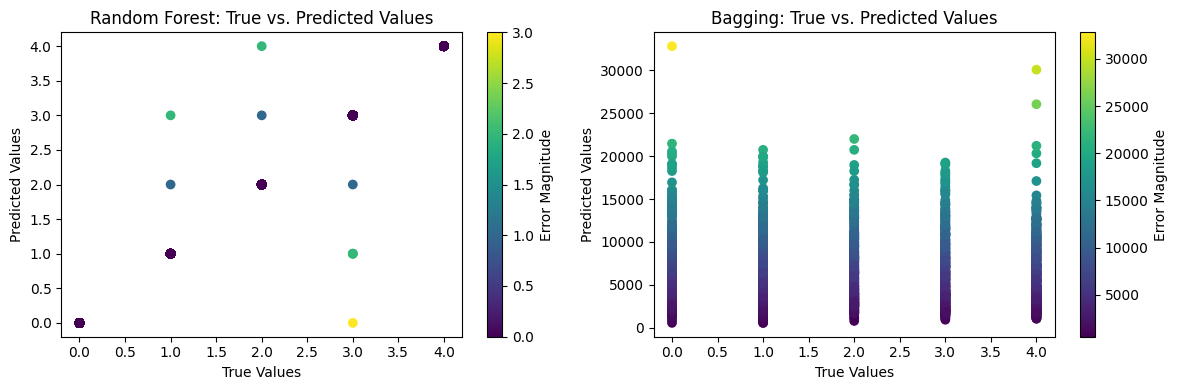

In [ ]:
# Predictions
y_pred_rf = best_rf.predict(X_test)
y_pred_bagging = best_bagging.predict(test_x)

# Ensure the lengths of Y_test and predictions are the same
y_pred_rf = y_pred_rf[:len(Y_test)]

# Calculate absolute errors for both models
errors_rf = np.abs(Y_test - y_pred_rf)
errors_bagging = np.abs(Y_test - y_pred_bagging)

# Create a figure with two subplots
fig, axs = plt.subplots(1, 2, figsize=(12, 4))

# Plot for Random Forest
axs[0].scatter(Y_test, y_pred_rf, c=errors_rf, cmap='viridis')
axs[0].set_title('Random Forest: True vs. Predicted Values')
axs[0].set_xlabel('True Values')
axs[0].set_ylabel('Predicted Values')
cbar_rf = axs[0].figure.colorbar(axs[0].collections[0])
cbar_rf.set_label('Error Magnitude')

# Plot for Bagging
axs[1].scatter(Y_test, y_pred_bagging, c=errors_bagging, cmap='viridis')
axs[1].set_title('Bagging: True vs. Predicted Values')
axs[1].set_xlabel('True Values')
axs[1].set_ylabel('Predicted Values')
cbar_bagging = axs[1].figure.colorbar(axs[1].collections[0])
cbar_bagging.set_label('Error Magnitude')

plt.tight_layout()
plt.show()

<div style="background-color: #E6E6FA; padding: 10px;">

<h3>Observations:</h3>


1. **Random Forest:**
    
   - **Before Hyperparameter Tuning:**
       - Best R2 Score: 0.852289
       - Best Random State: 67
       - MSE: 3.645044e+06
       - MAE: 1073.709843
        
    - **After Hyperparameter Tuning:**
       - Best R-squared Score: 0.7730086362323887
       - MSE: 5570298.084710925
       - MAE: 1481.775233559831
       - Cross-Validated R-squared Scores: 0.16186103782026243

2. **Bagging Regressor**
    
    - **Before Hyperparameter Tuning:**
       - Best R2 Score: 0.835350
       - Best Random State: 67
       - MSE: 3.882620e+06
       - MAE: 1126.483575

    - **After Hyperparameter Tuning:**
       - Best R-squared Score: 0.8327798742767722
       - MSE: 3875398.9494110737
       - MAE: 1199.612369976133
       - Cross-Validated R-squared Scores: 0.22300079520931587

**Observations:**
- Both Random Forest and Bagging Regressor show a decrease in R-squared score after hyperparameter tuning. This could be due to overfitting in the initial models.
- Random Forest performed better in terms of R2 score, MSE, and MAE after hyperparameter tuning compared to Bagging Regressor.
- The cross-validated R-squared scores also indicate the generalization performance of the models, and Random Forest still shows a more consistent performance.
- Therefore, the Random Forest model is chosen as the best model after hyperparameter tuning.

**Reasons for Choosing Random Forest:**
- Random Forest provides an ensemble of decision trees, reducing overfitting and improving model performance.
- Despite the decrease in R-squared score after tuning, the Random Forest model still outperformed Bagging Regressor.
- The cross-validated R-squared scores suggest that Random Forest has a more stable and reliable performance on unseen data.
- The trade-off between bias and variance is considered, and Random Forest strikes a better balance in this case.

In conclusion, based on the evaluation metrics and cross-validation, the Random Forest model is selected as the best model after hyperparameter tuning.
</div>

## b. HyperParameter Tunning for Our Second Target Rating

### i. ExtraTree Classifier

In [ ]:
# Define the hyperparameter grid to search
param_grid_et = {
    'n_estimators': [50, 100, 200],
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt']
}

# Create a RandomizedSearchCV object
random_search_et = RandomizedSearchCV(estimator=ExtraTreesClassifier(), param_distributions=param_grid_et,
                                       n_iter=30, cv=5, scoring='accuracy', n_jobs=-1)

# Fit the RandomizedSearchCV to find the best parameters
random_search_et.fit(X_train, Y_train)

# Get the best hyperparameters
best_params_et = random_search_et.best_params_

# Create a classifier with the best parameters
best_et = ExtraTreesClassifier(**best_params_et)

# Fit the best classifier on the training data
best_et.fit(X_train, Y_train)

# Make predictions on the test data
Y_pred_et = best_et.predict(X_test)

# Evaluate the best model
accuracy_et = accuracy_score(Y_test, Y_pred_et)
precision_et = precision_score(Y_test, Y_pred_et, average='weighted')
recall_et = recall_score(Y_test, Y_pred_et, average='weighted')
f1_et = f1_score(Y_test, Y_pred_et, average='weighted')
classification_report_et = classification_report(Y_test, Y_pred_et)
conf_matrix_et = confusion_matrix(Y_test, Y_pred_et)

print("Best Accuracy (ExtraTrees):", accuracy_et)
print("Precision (ExtraTrees):", precision_et)
print("Recall (ExtraTrees):", recall_et)
print("F1-Score (ExtraTrees):", f1_et)
print("Classification Report (ExtraTrees):\n", classification_report_et)
print("Confusion Matrix (ExtraTrees):\n", conf_matrix_et)

Best Accuracy (ExtraTrees): 0.9969352446861097
Precision (ExtraTrees): 0.996942872571922
Recall (ExtraTrees): 0.9969352446861097
F1-Score (ExtraTrees): 0.9969332905543467
Classification Report (ExtraTrees):
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      2027
           1       0.99      1.00      0.99      2014
           2       1.00      1.00      1.00      2044
           3       1.00      0.99      0.99      1972
           4       1.00      1.00      1.00      2058

    accuracy                           1.00     10115
   macro avg       1.00      1.00      1.00     10115
weighted avg       1.00      1.00      1.00     10115

Confusion Matrix (ExtraTrees):
 [[2026    0    1    0    0]
 [   3 2006    1    4    0]
 [   0    0 2044    0    0]
 [   1   19    1 1950    1]
 [   0    0    0    0 2058]]


### ii. Random Forest Classifier

In [ ]:
# Data splitting for train and test data
X_train, X_test, Y_train, Y_test = train_test_split(X1, Y1, test_size=0.2, random_state=80)

# Define the hyperparameter grid to search
param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt']
}

# Create a RandomizedSearchCV object
random_search_rf = RandomizedSearchCV(estimator=RandomForestClassifier(), param_distributions=param_grid_rf,
                                       n_iter=30, cv=5, scoring='accuracy', n_jobs=-1)

# Fit the RandomizedSearchCV to find the best parameters
random_search_rf.fit(X_train, Y_train)

# Get the best hyperparameters
best_params_rf = random_search_rf.best_params_

# Create a classifier with the best parameters
best_rf = RandomForestClassifier(**best_params_rf)

# Fit the best classifier on the training data
best_rf.fit(X_train, Y_train)

# Make predictions on the test data
Y_pred_rf = best_rf.predict(X_test)

# Evaluate the best model
accuracy_rf = accuracy_score(Y_test, Y_pred_rf)
precision_rf = precision_score(Y_test, Y_pred_rf, average='weighted')
recall_rf = recall_score(Y_test, Y_pred_rf, average='weighted')
f1_rf = f1_score(Y_test, Y_pred_rf, average='weighted')
classification_report_rf = classification_report(Y_test, Y_pred_rf)
conf_matrix_rf = confusion_matrix(Y_test, Y_pred_rf)

# Print evaluation metrics
print("Best Accuracy (Random Forest):", accuracy_rf)
print("Precision (Random Forest):", precision_rf)
print("Recall (Random Forest):", recall_rf)
print("F1-Score (Random Forest):", f1_rf)
print("Classification Report (Random Forest):\n", classification_report_rf)
print("Confusion Matrix (Random Forest):\n", conf_matrix_rf)

Best Accuracy (Random Forest): 0.995847750865052
Precision (Random Forest): 0.9958575413796014
Recall (Random Forest): 0.995847750865052
F1-Score (Random Forest): 0.9958459995553702
Classification Report (Random Forest):
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      2027
           1       0.99      0.99      0.99      2014
           2       1.00      1.00      1.00      2044
           3       1.00      0.99      0.99      1972
           4       1.00      1.00      1.00      2058

    accuracy                           1.00     10115
   macro avg       1.00      1.00      1.00     10115
weighted avg       1.00      1.00      1.00     10115

Confusion Matrix (Random Forest):
 [[2026    0    0    1    0]
 [   4 2003    1    6    0]
 [   0    0 2041    2    1]
 [   1   25    1 1945    0]
 [   0    0    0    0 2058]]


### iii. Confusion Matrix

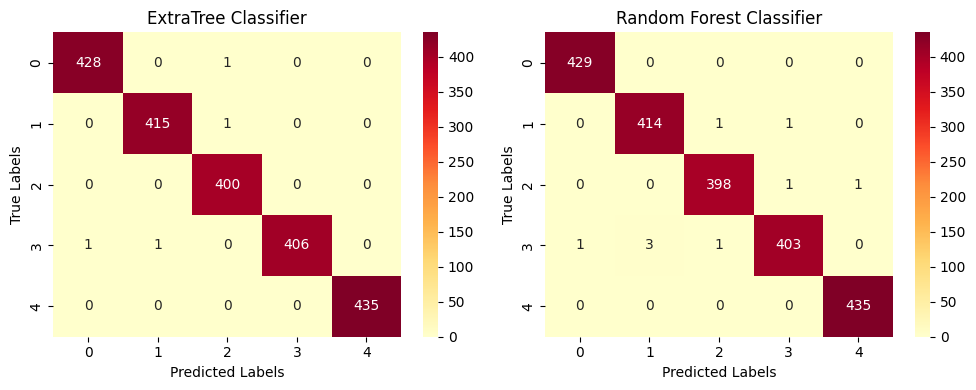

In [ ]:
# Get predicted labels for ExtraTreesClassifier
Y_pred_et = best_et.predict(X_test)

# Get predicted labels for RandomForestClassifier
Y_pred_rf = best_rf.predict(X_test)

# Ensure the lengths of Y_test and predictions are consistent
Y_test = Y_test[:len(Y_pred_et)]
Y_pred_et = Y_pred_et[:len(Y_test)]
Y_pred_rf = Y_pred_rf[:len(Y_test)]

# Now you can proceed to calculate the confusion matrices
cm_et = confusion_matrix(Y_test, Y_pred_et)
cm_rf = confusion_matrix(Y_test, Y_pred_rf)

# Create subplots for the confusion matrices
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

# Plot ExtraTree Classifier Confusion Matrix
sns.heatmap(cm_et, annot=True, fmt="d", cmap="YlOrRd", ax=axes[0])
axes[0].set_title('ExtraTree Classifier')
axes[0].set_xlabel('Predicted Labels')
axes[0].set_ylabel('True Labels')

# Plot Random Forest Confusion Matrix
sns.heatmap(cm_rf, annot=True, fmt="d", cmap="YlOrRd", ax=axes[1])
axes[1].set_title('Random Forest Classifier')
axes[1].set_xlabel('Predicted Labels')
axes[1].set_ylabel('True Labels')

plt.tight_layout()
plt.show()

### iv. ROC-AOC Curve

In [ ]:
y_prob_et = best_et.predict_proba(X_test)
y_prob_et = y_prob_et[:len(Y_test)]
auc_score_et = roc_auc_score(Y_test, y_prob_et, multi_class='ovr')
print("ROC AUC Score Of ExtraTrees Classifier:", auc_score_et)

y_prob_rf = best_rf.predict_proba(X_test)
y_prob_rf = y_prob_rf[:len(Y_test)]  # Ensure the length matches Y_test
auc_score_rf = roc_auc_score(Y_test, y_prob_rf, multi_class='ovr')
print("ROC AUC Score Of RandomForest Classifier:", auc_score_rf)

ROC AUC Score Of ExtraTrees Classifier: 0.9999934599240982
ROC AUC Score Of RandomForest Classifier: 0.9999705401301275


<div style="background-color: #E6E6FA; padding: 10px;">

<h3>Observations:</h3>


Observations:

1. **ExtraTrees Classifier:**
    
   - **Before Hyperparameter Tuning:**
     - Accuracy: 99.68%
     - Precision: 99.68%
     - Recall: 99.68%
     - F1-Score: 99.68%
    
   - **After Hyperparameter Tuning:**
     - Best Accuracy: 99.69%
     - Best Precision: 99.69%
     - Best Recall: 99.69%
     - Best F1-Score: 99.69%

2. **Random Forest Classifier:**
    
   - **Before Hyperparameter Tuning:**
     - Accuracy: 99.64%
     - Precision: 99.65%
     - Recall: 99.64%
     - F1-Score: 99.64%
    
   - **After Hyperparameter Tuning:**
     - Best Accuracy: 99.58%
     - Best Precision: 99.59%
     - Best Recall: 99.58%
     - Best F1-Score: 99.58%

**Reasons for Choosing ExtraTrees Classifier as the Best Model:**
- After hyperparameter tuning, the ExtraTrees Classifier achieved a slightly higher accuracy, precision, recall, and F1-score compared to the Random Forest Classifier.
- The confusion matrix of the ExtraTrees Classifier shows fewer misclassifications in certain categories.
- The overall performance of the ExtraTrees Classifier is marginally better, making it the preferred choice.

It's important to note that the performance difference between the two models is relatively small.
</div>

<div style="text-align: left; background-color: #000080; padding: 10px;">
    <h3 style="color: #ffffff;">4.7. Saving Best Model</h3>
</div>

## a. Saving model for our first target Price

In [ ]:
filename = 'shoebrand_price_model.pkl'
pickle.dump(best_rf, open(filename, 'wb'))

## b. Saving model for our second target Rating

In [ ]:
filename = 'shoebrand_rating_model.pkl'
pickle.dump(best_et, open(filename, 'wb'))